# Project 2 - Car Insurance Claim Prediction

## 5.1 Software/Library Installation 

•	Python Website, https://www.python.org/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  


Let's start by reading the data into a pandas DataFrame.


In [1]:
import pandas as pd
data = pd.read_csv('data/train.csv')

print(data.head())
data.info(verbose = True)

  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No  

We can already see that there are no null columns, so we don't need to worry about that.
Also, memory usage is acceptable so we can use all the data in the training set.
<br>
The policy_id column is unique for each object, so it won't be of much help for finding patterns in the data. Furthermore, the policy_ids for the data to which the model will be applied to will be different, so we decided to drop it.

In [2]:
data.drop("policy_id",axis=1,inplace=True)
print(data.head())

   policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  ...  \
0                4990     1       A    M1       CNG   60Nm@3500rpm  ...   
1               27003     1       A    M1       CNG   60Nm@3500rpm  ...   
2                4076     1       A    M1       CNG   60Nm@3500rpm  ...   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm  ...   
4               34738     2       A    M3    Petrol   91Nm@4250rpm  ...   

  is_brake_assist is_power_door_locks  is_central_locking is_power_steering  \
0              No                  No                  No               Y

The dataset includes max_torque and max_power in the format 60Nm@3500rpm and 40.36bhp@6000rpm, respectively. Instead of just using one-hot encoding and increasing the dimensionality tremendously, we decided to split each of these two labels into two labels of their own (i.e. 4 labels in total).

In [3]:
data["max_torque_Nm"] = data["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
data["max_torque_rpm"] = data["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

data["max_power_bhp"] = data["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
data["max_power_rpm"] = data["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

#Drop original cols
data.drop(["max_torque","max_power"],axis=1,inplace=True)

print(data.head())

   policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type         engine_type  ...  \
0                4990     1       A    M1       CNG   F8D Petrol Engine  ...   
1               27003     1       A    M1       CNG   F8D Petrol Engine  ...   
2                4076     1       A    M1       CNG   F8D Petrol Engine  ...   
3               21622     1      C1    M2    Petrol  1.2 L K12N Dualjet  ...   
4               34738     2       A    M3    Petrol             1.0 SCe  ...   

   is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                                No           

A lot of labels were binary but represented as Yes/No rather than 1/0, so we decided to replace Yes with True and No with False, making the column of type boolean rather than String

In [4]:
data = data.replace({ "No" : False , "Yes" : True })
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  int64  
 11  is_esc                            58592 non-null  bool   
 12  is_a

There are 8 non-numerical attributes left:
<ul>
    <li>area_cluster</li>
    <li>segment</li>
    <li>model</li>
    <li>fuel_type</li>
    <li>engine_type</li>
    <li>rear_brakes_type</li>
    <li>transmission_type</li>
    <li>steering_type</li>
</ul>

All of them are categorical attributes, and we shall use one-hot encoding for them when using ML algorithms. We are passing the dataframe with the encoded data to a new variable so it doesn't disturb the analysis of the data.

In [5]:
data['segment'] = data['segment'].replace({'A': 0, 'B1': 1, 'B2': 2, 'C1': 3, 'C2': 4,'Utility': 5})
data['rear_brakes_type'] = data['rear_brakes_type'].replace({'Disc':True,'Drum':False})
data['transmission_type'] = data['transmission_type'].replace({'Automatic':True,'Manual':False})

categorical_cols = data.select_dtypes(include=['object']).columns

categories_encoded_data = pd.get_dummies(data, columns=categorical_cols)

categories_encoded_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 90 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58592 non-null  float64
 1   age_of_car                             58592 non-null  float64
 2   age_of_policyholder                    58592 non-null  float64
 3   population_density                     58592 non-null  int64  
 4   make                                   58592 non-null  int64  
 5   segment                                58592 non-null  int64  
 6   airbags                                58592 non-null  int64  
 7   is_esc                                 58592 non-null  bool   
 8   is_adjustable_steering                 58592 non-null  bool   
 9   is_tpms                                58592 non-null  bool   
 10  is_parking_sensors                     58592 non-null  bool   
 11  is

And just like that, all the data is now numerical. Let's now do some analysis of the data to look for any pre-processing opportunities.

<AxesSubplot: xlabel='is_claim', ylabel='count'>

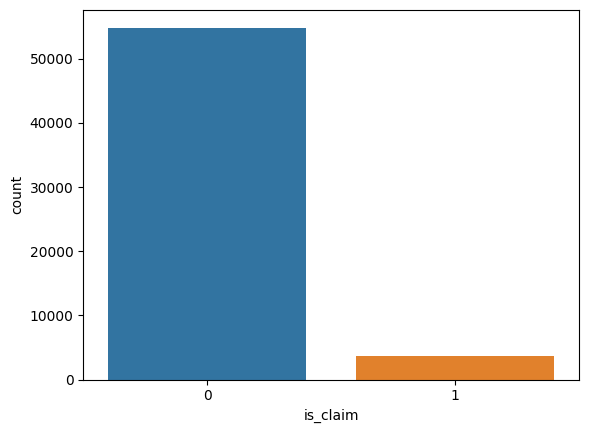

In [6]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
sb.countplot(x='is_claim',data=data)

As we can see, the data is extremely skewed, which means we will need to balance it before applying the algorithms.

C:\Users\Pedro\AppData\Local\Temp\ipykernel_11336\584675540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(),annot=True)


<AxesSubplot: >

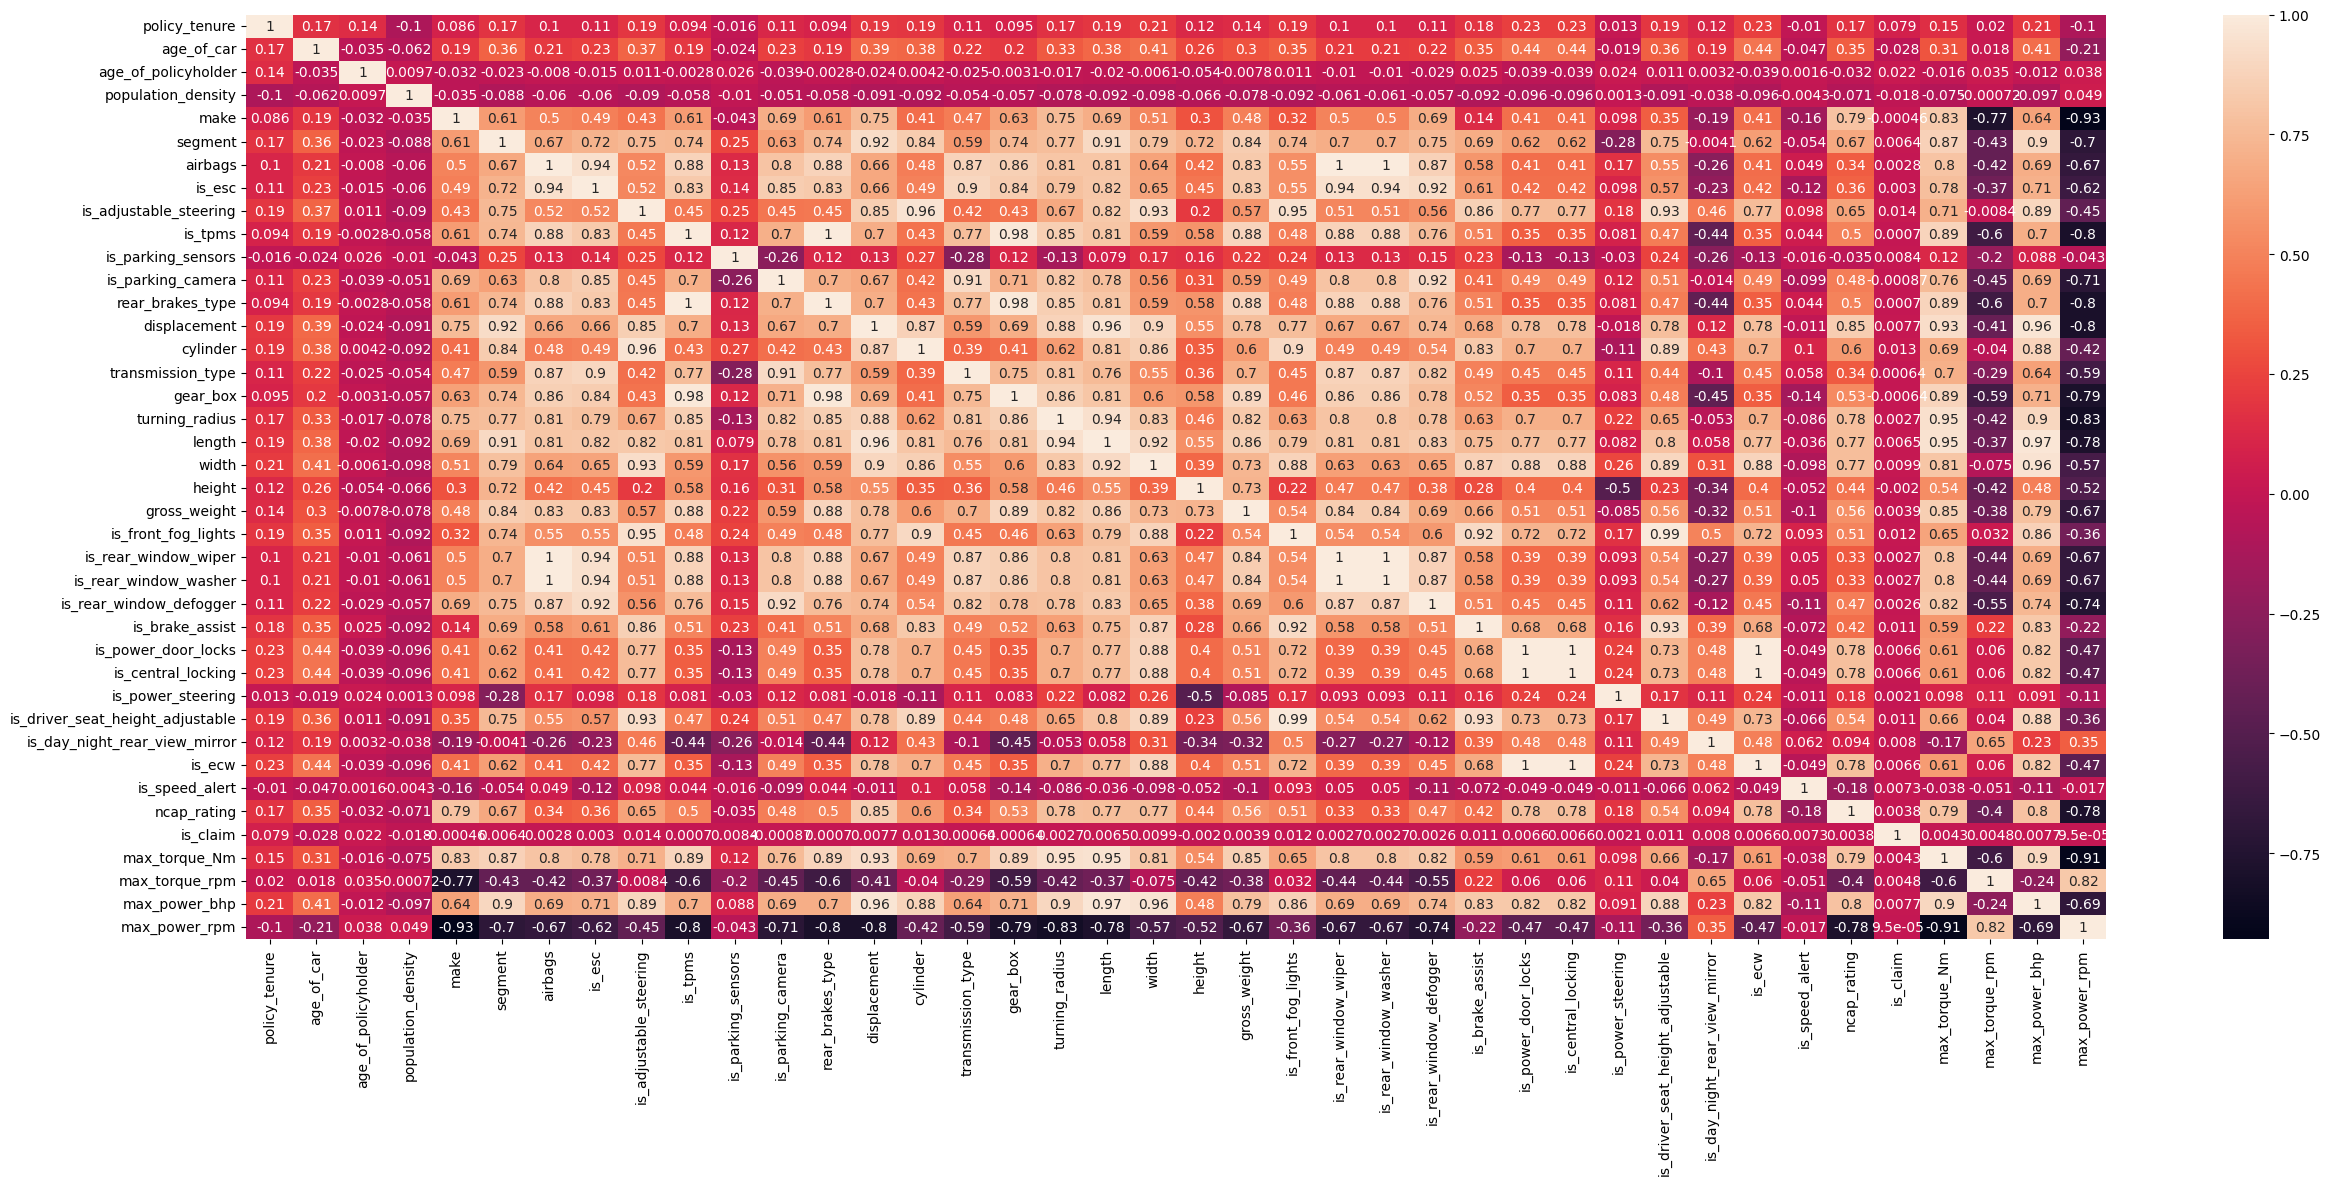

In [7]:
plt.figure(figsize=(30,12))
sb.heatmap(data.corr(),annot=True)


Let's split the attributes into categorical attributes and numerical attributes

In [12]:
cat_list=[]
num_list=[]

for i in data.columns:
    unique_val=len(data[i].unique())
    
    if unique_val<15:
        cat_list.append(i)
    else:
        num_list.append(i)


num_list.remove("area_cluster")
cat_list.append("area_cluster")

C:\Users\Pedro\AppData\Local\Temp\ipykernel_11336\3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


<Figure size 800x600 with 0 Axes>

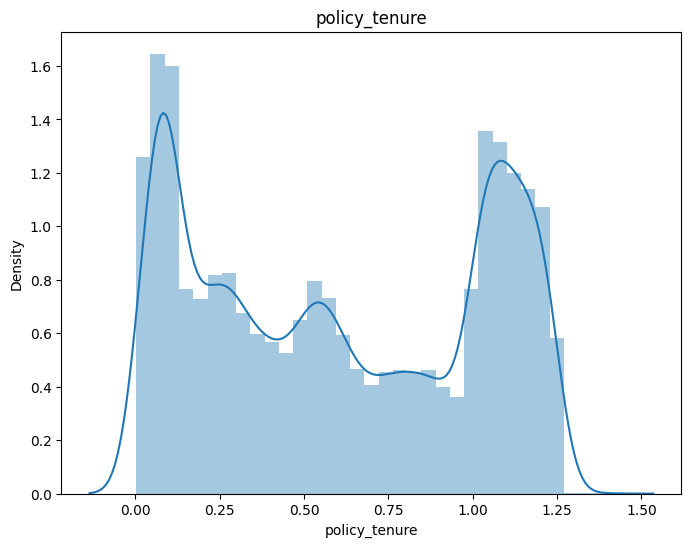

C:\Users\Pedro\AppData\Local\Temp\ipykernel_11336\3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


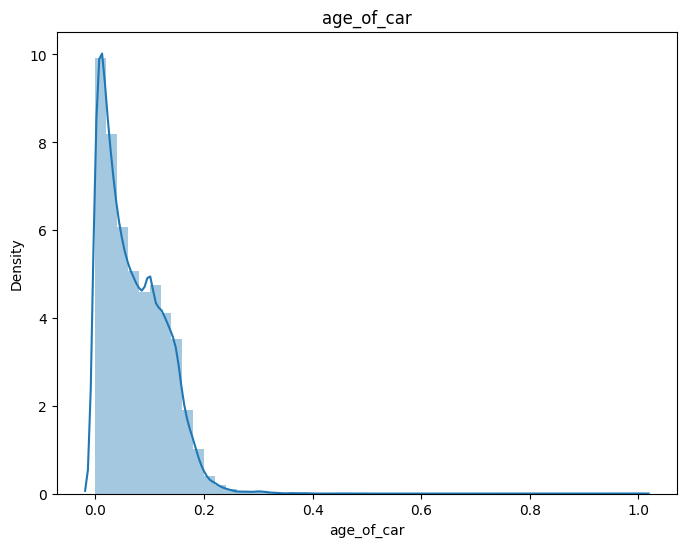

C:\Users\Pedro\AppData\Local\Temp\ipykernel_11336\3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


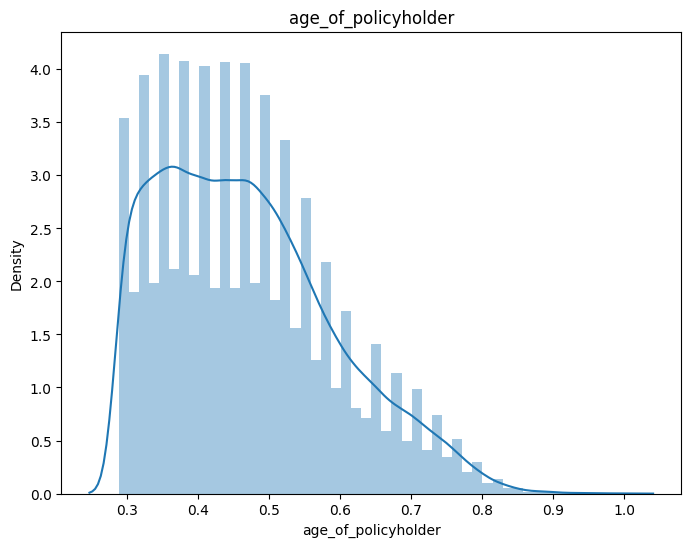

C:\Users\Pedro\AppData\Local\Temp\ipykernel_11336\3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


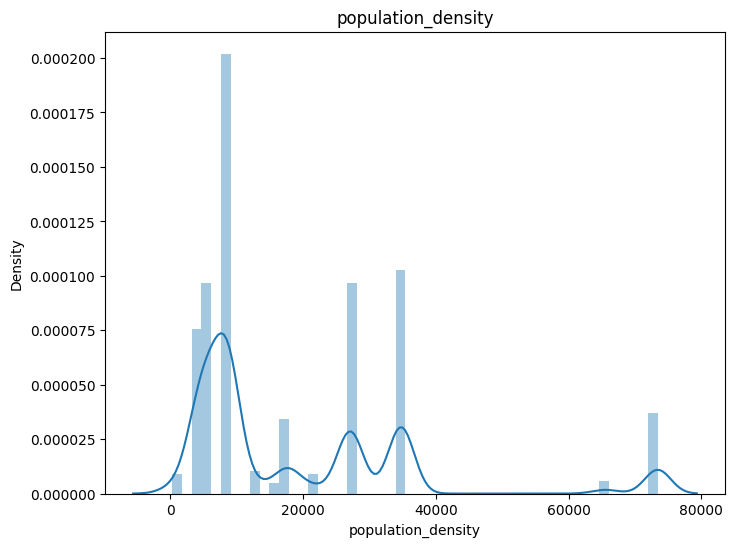

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(8, 6))  # Set the individual figure size

plt.suptitle("Distribution of Numerical Values")

for i in data.loc[:, num_list]:
    plt.figure(figsize=(8, 6))  # Set the individual figure size for each plot
    sb.distplot(data[i])
    plt.title(i)
    plt.show()

There don't seem to be any outliers, so we will not perform outlier removal

Now that we analyzed the data, we can start creating the models. First let's split the data into train and test data. Each of this groups also needs to be split into inputs and labels

C:\Users\Pedro\AppData\Local\Temp\ipykernel_11336\4186395640.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(13,13))


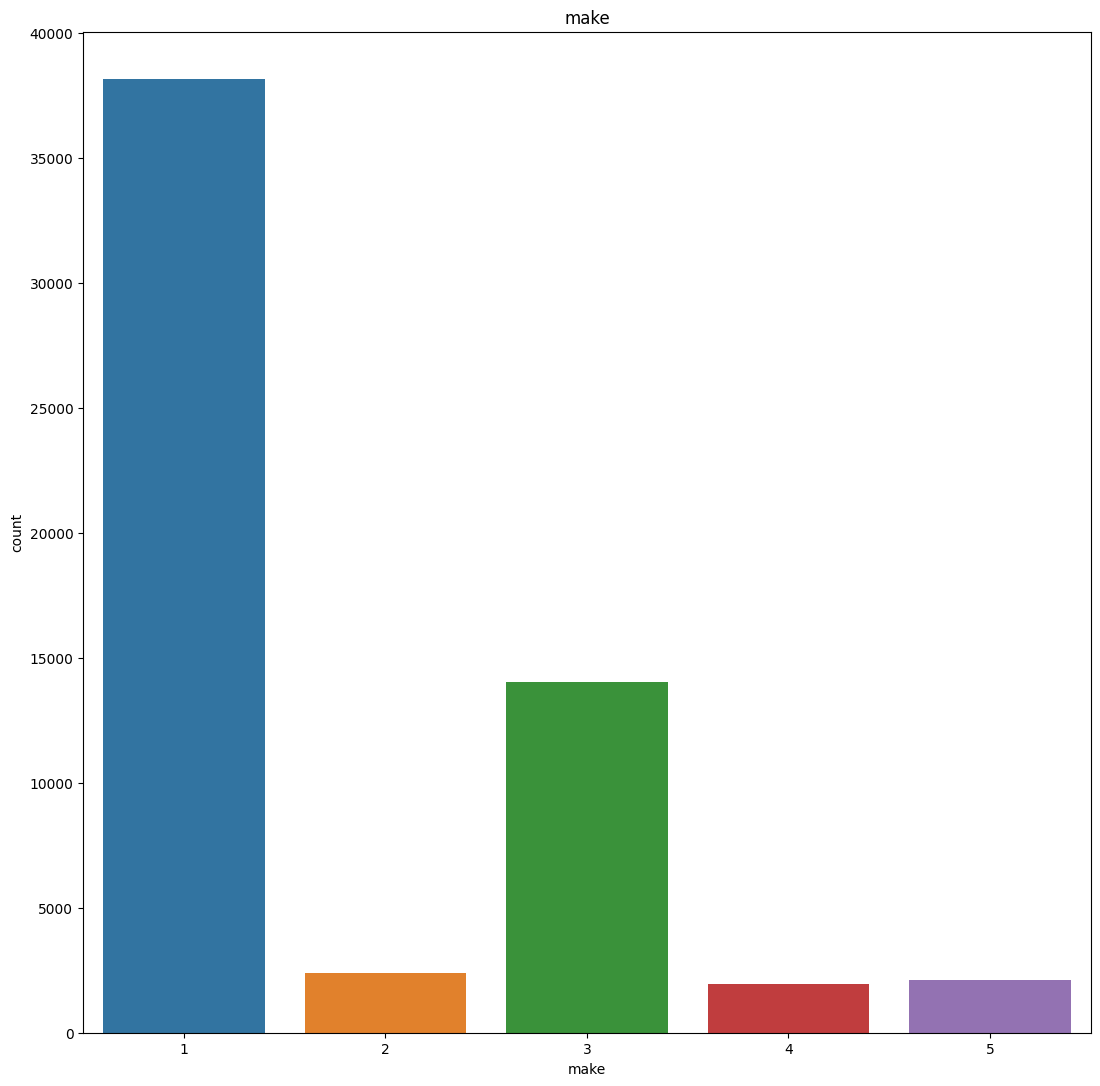

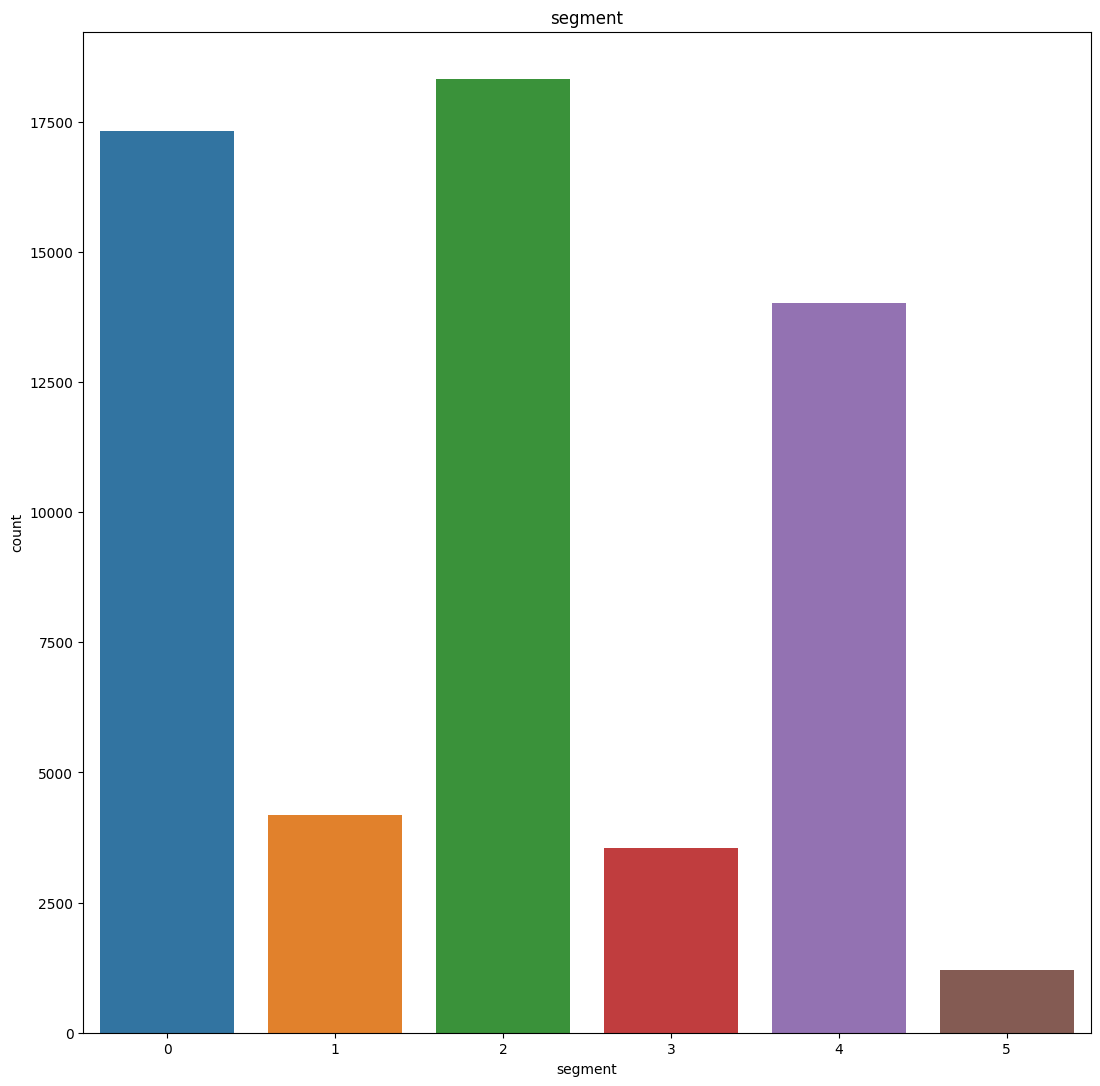

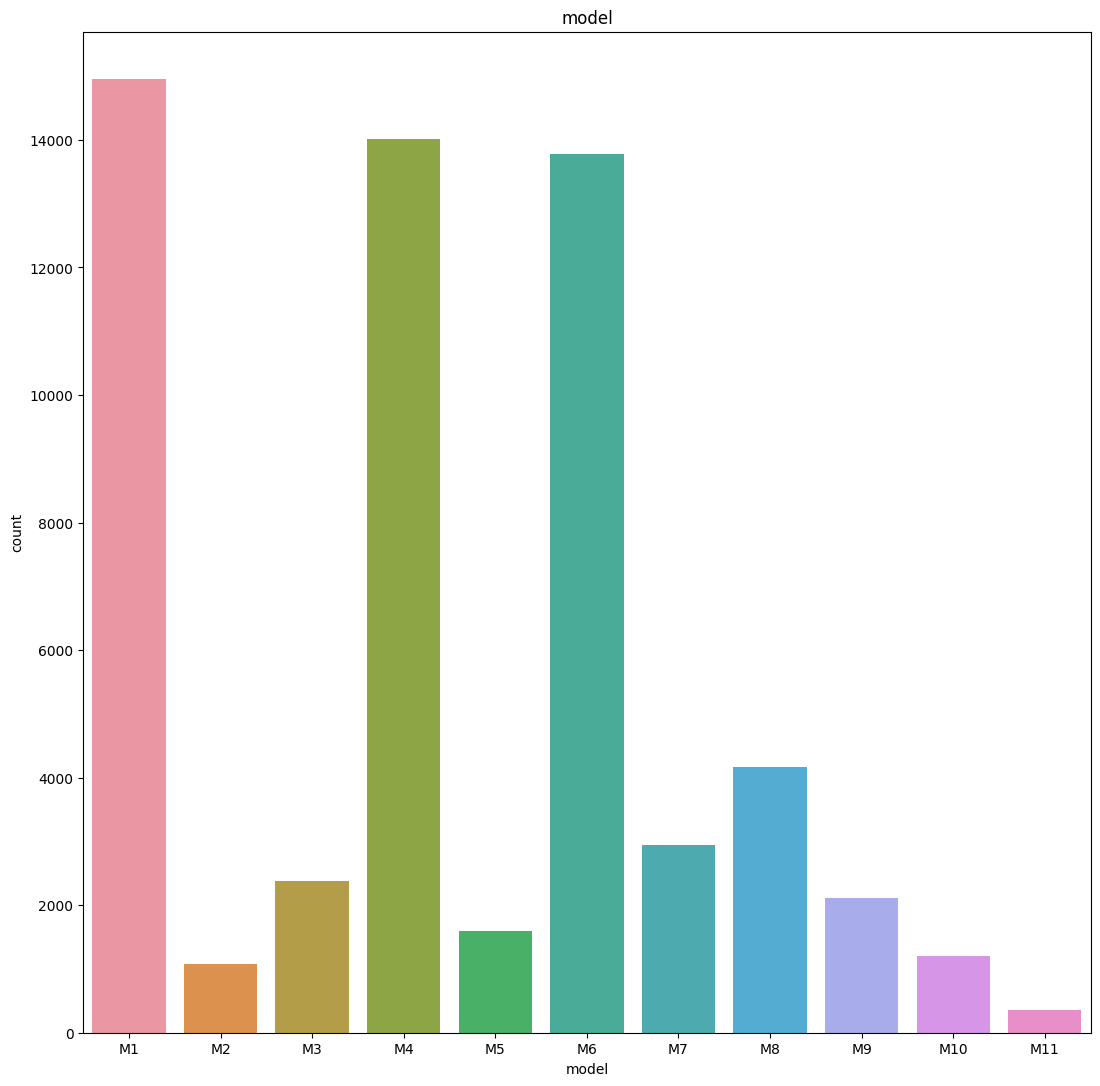

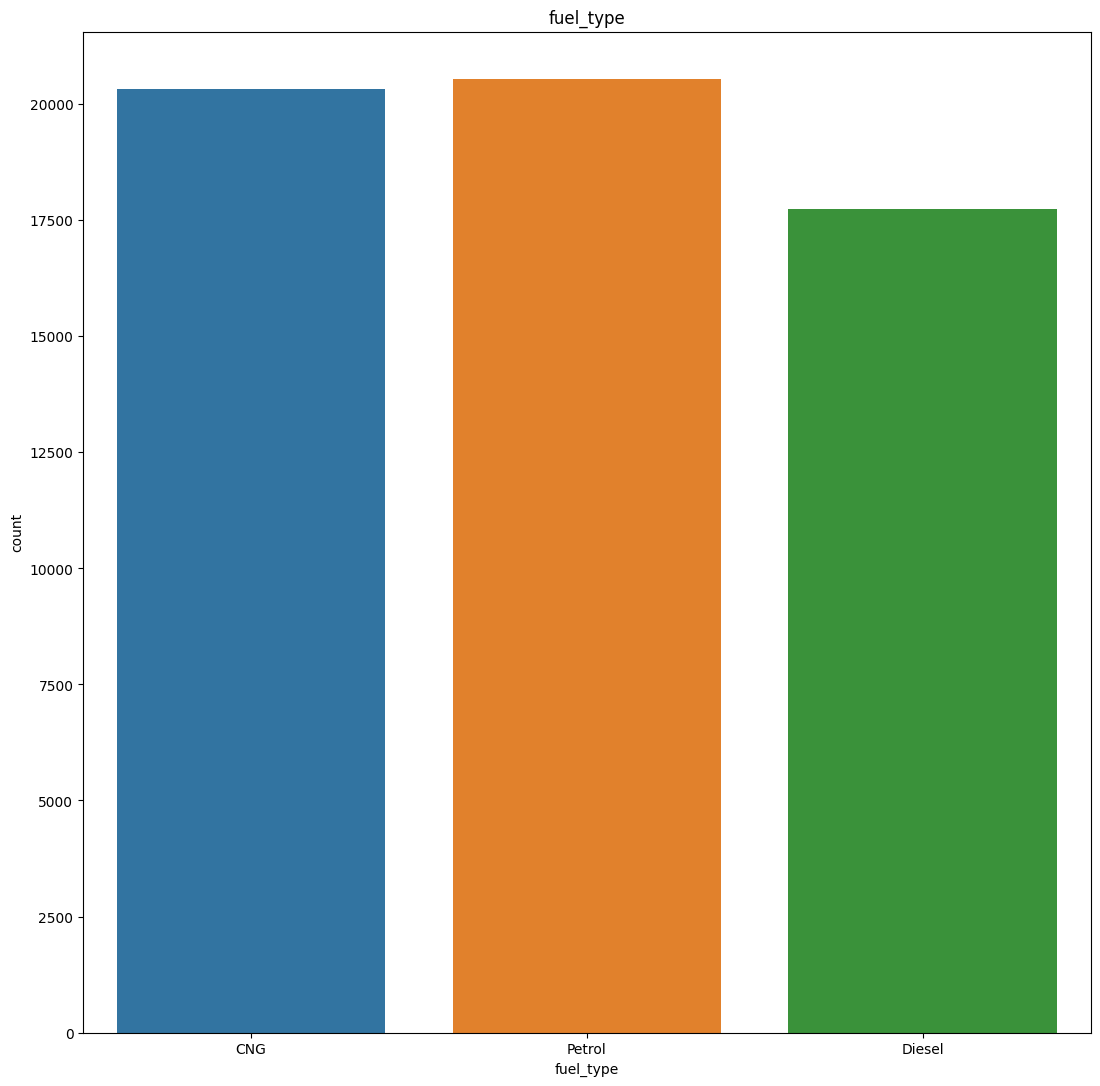

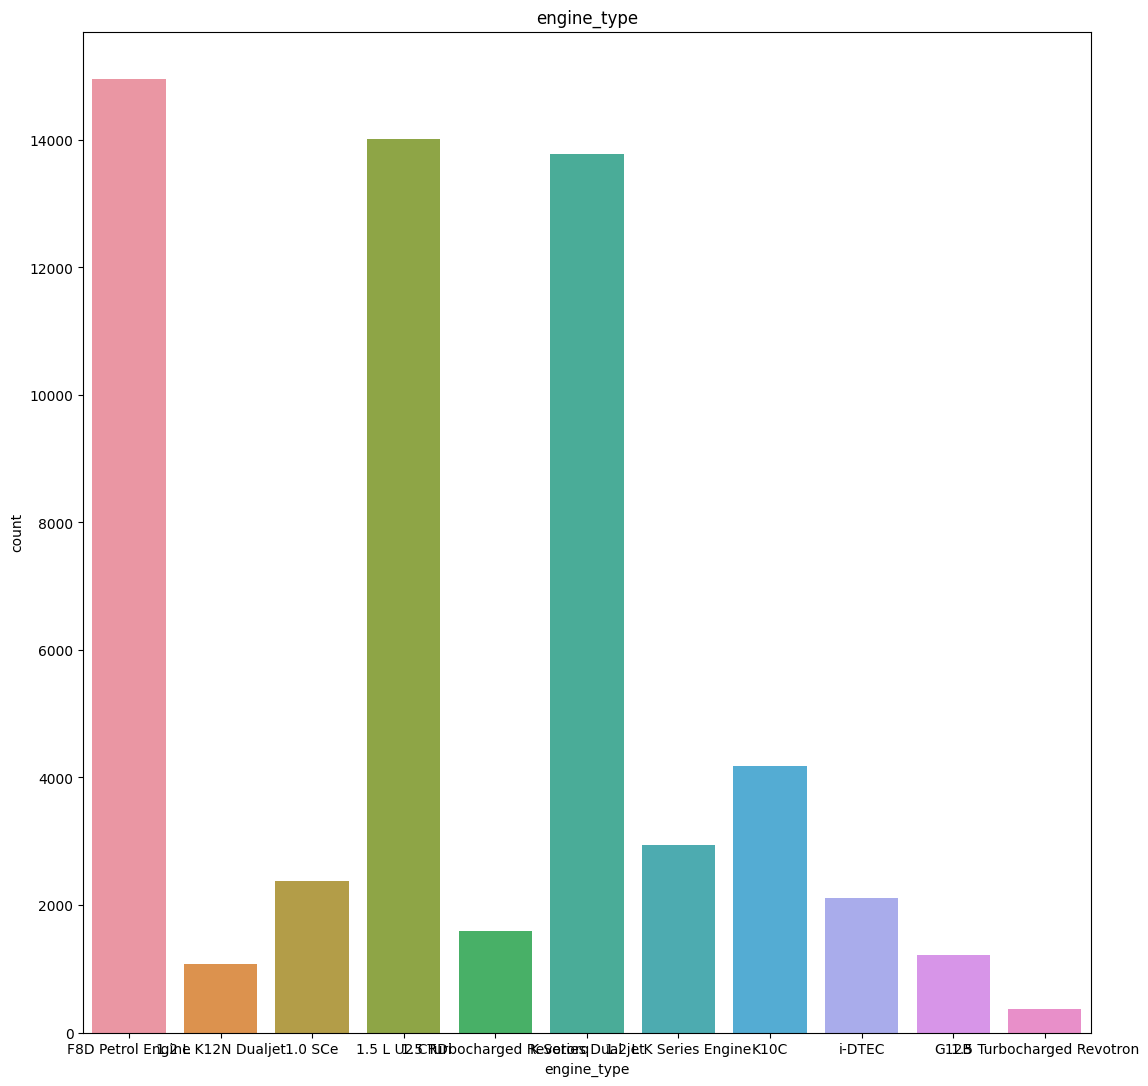

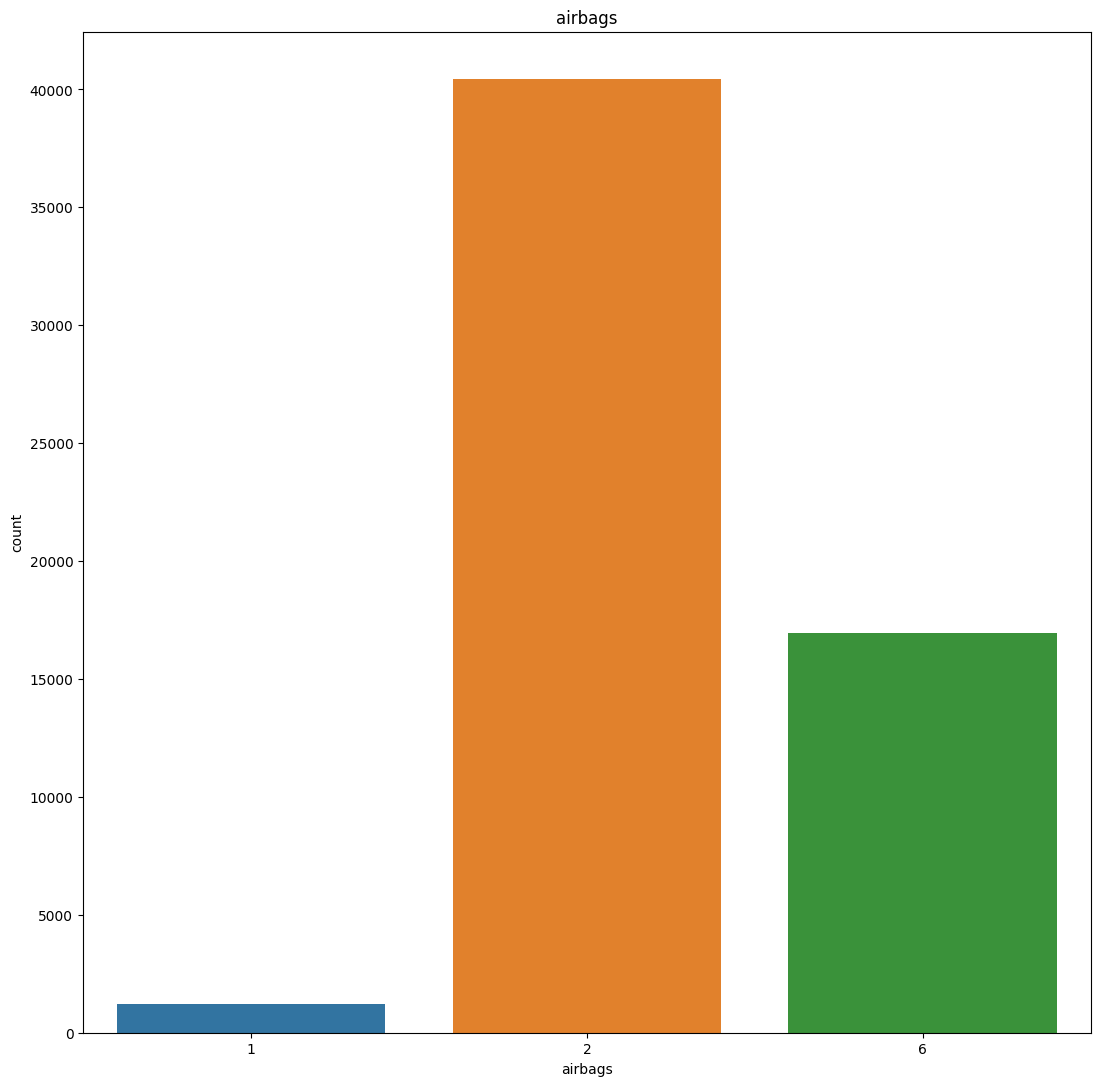

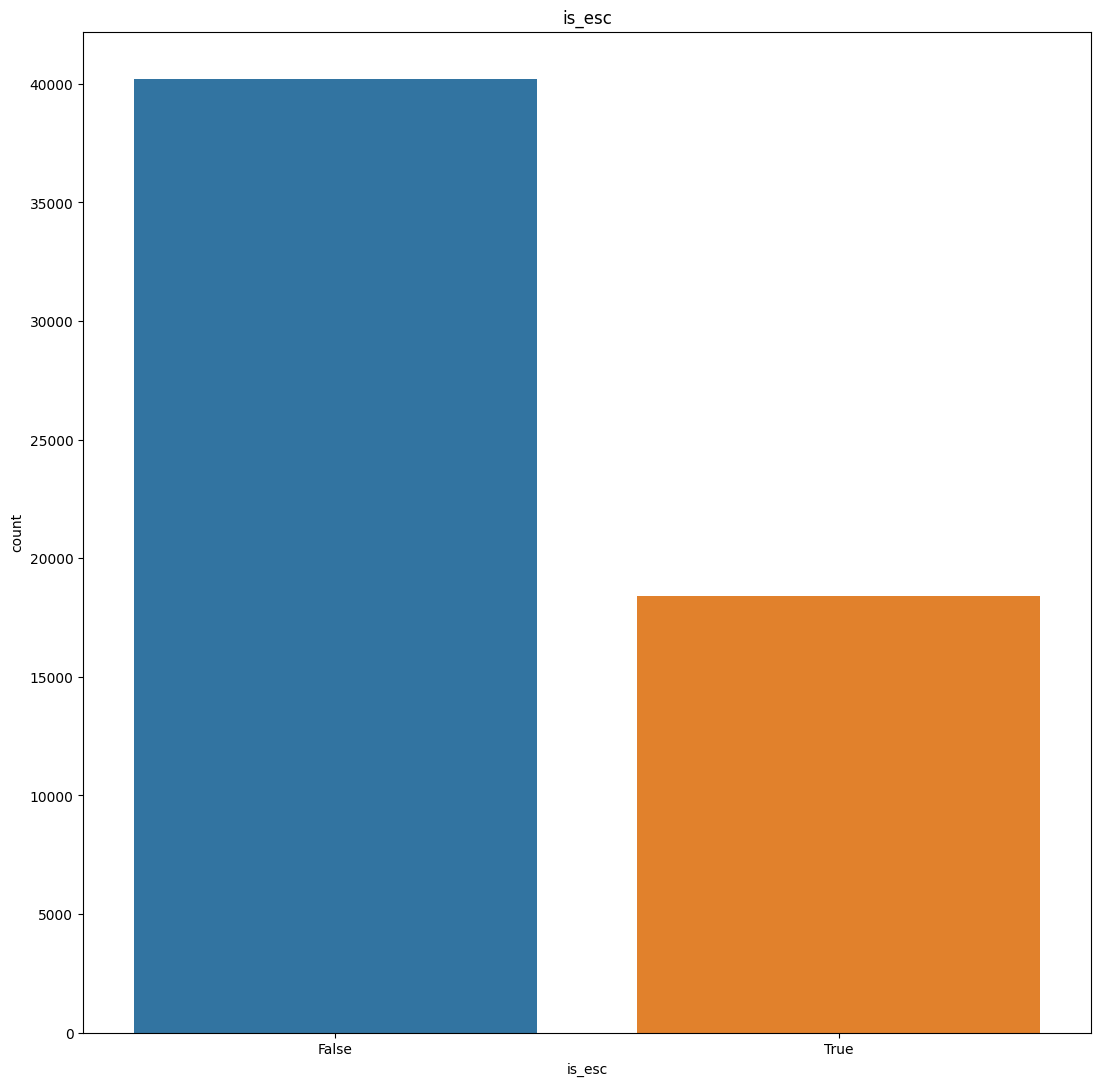

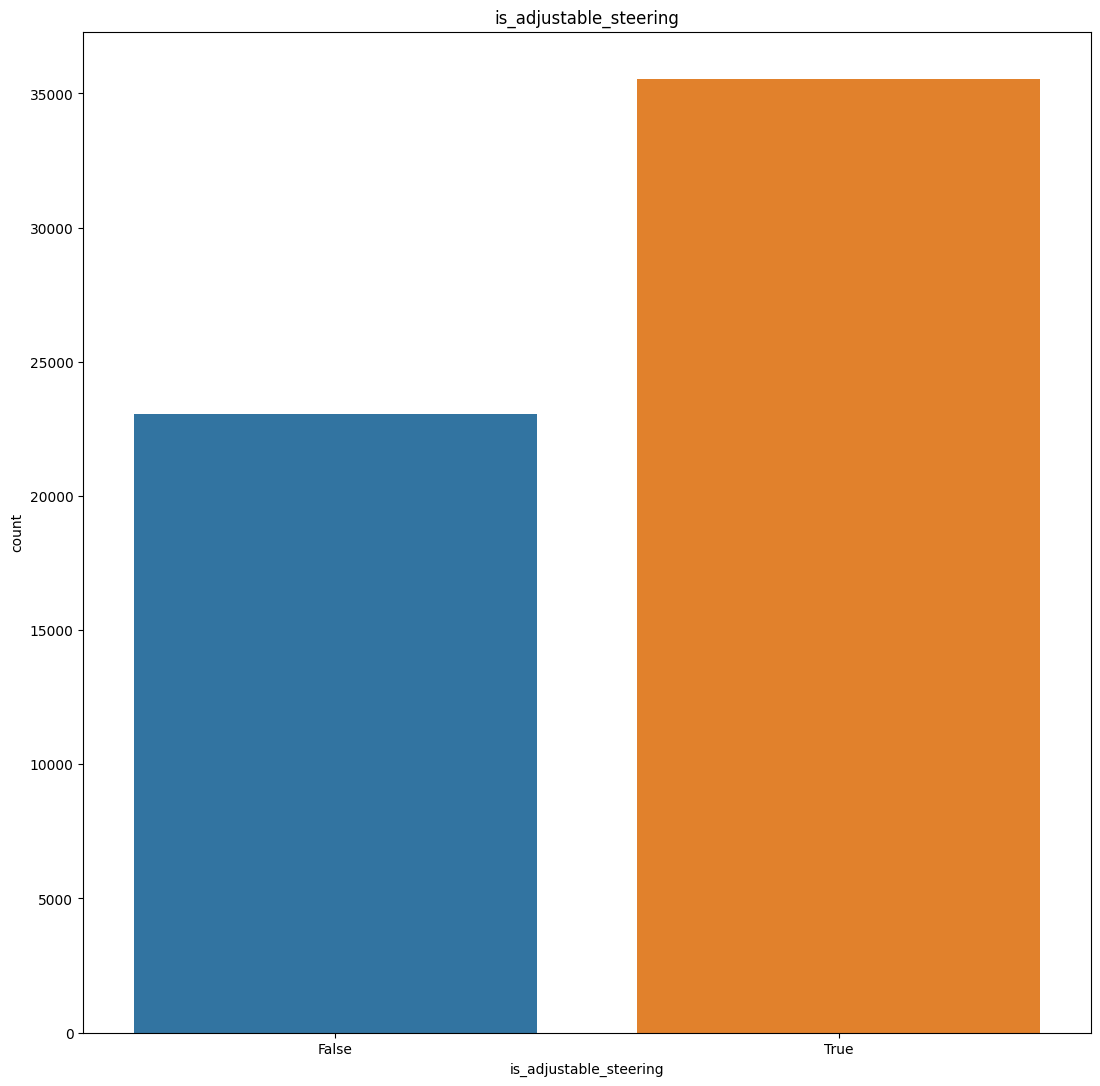

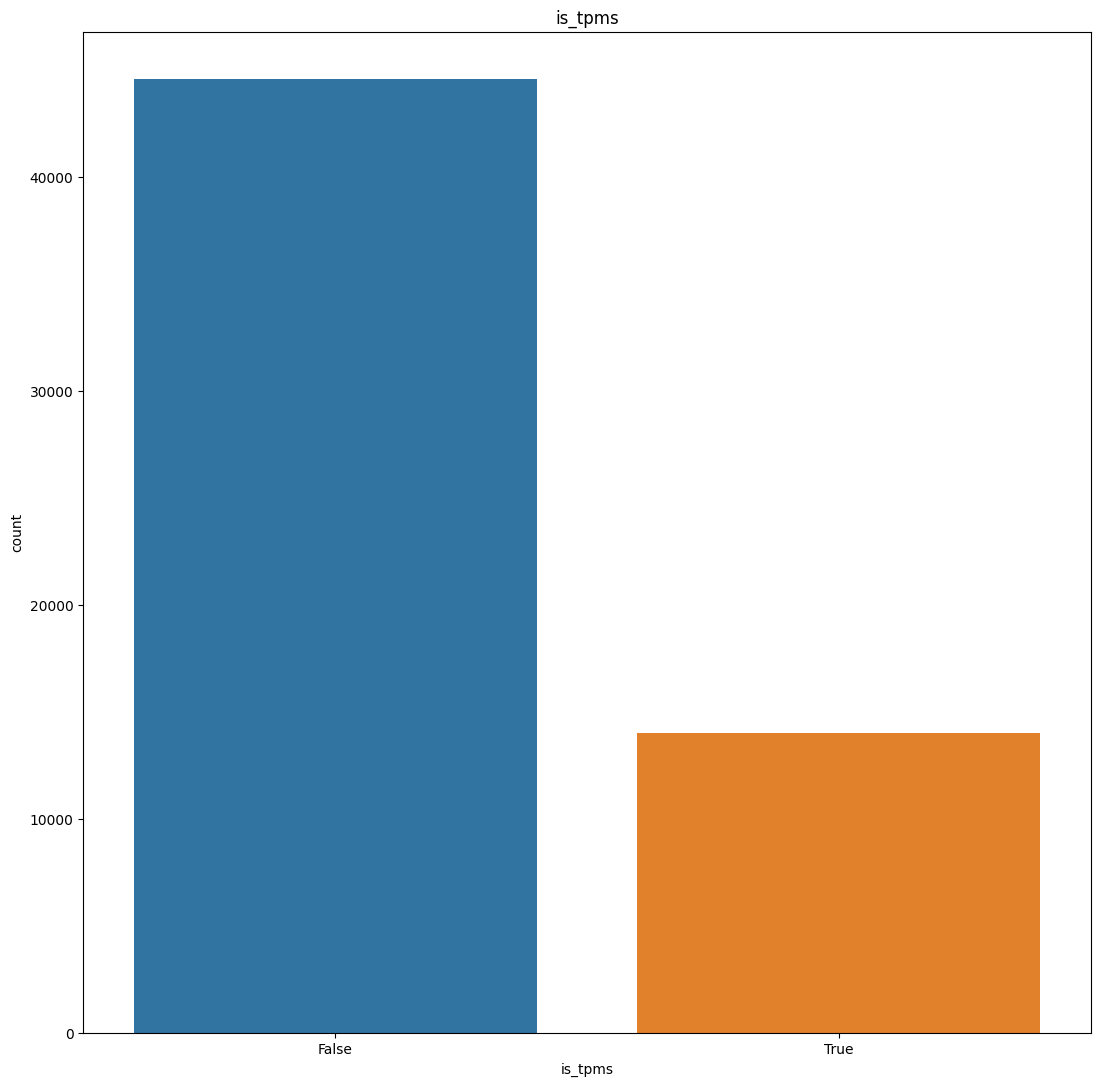

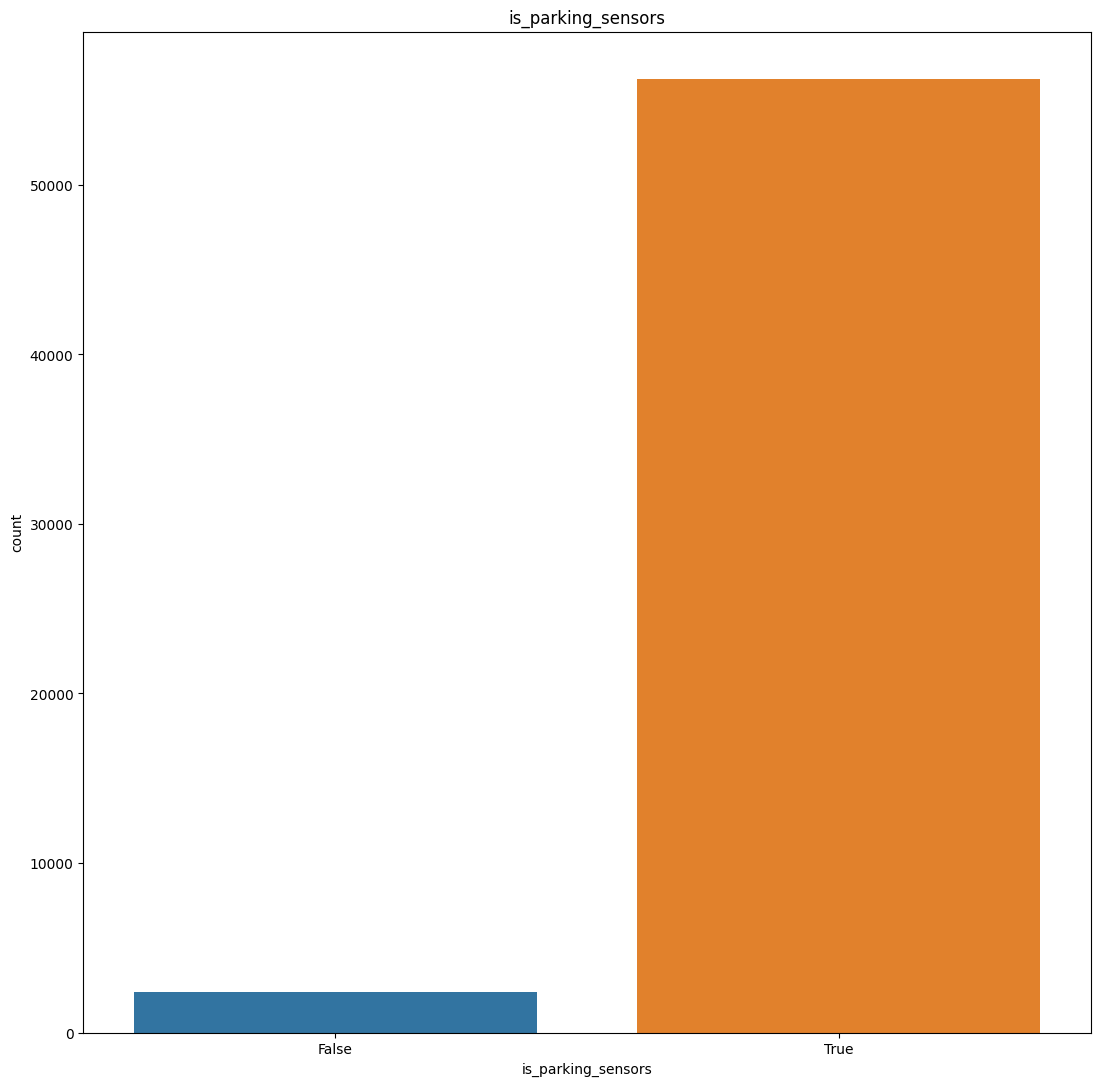

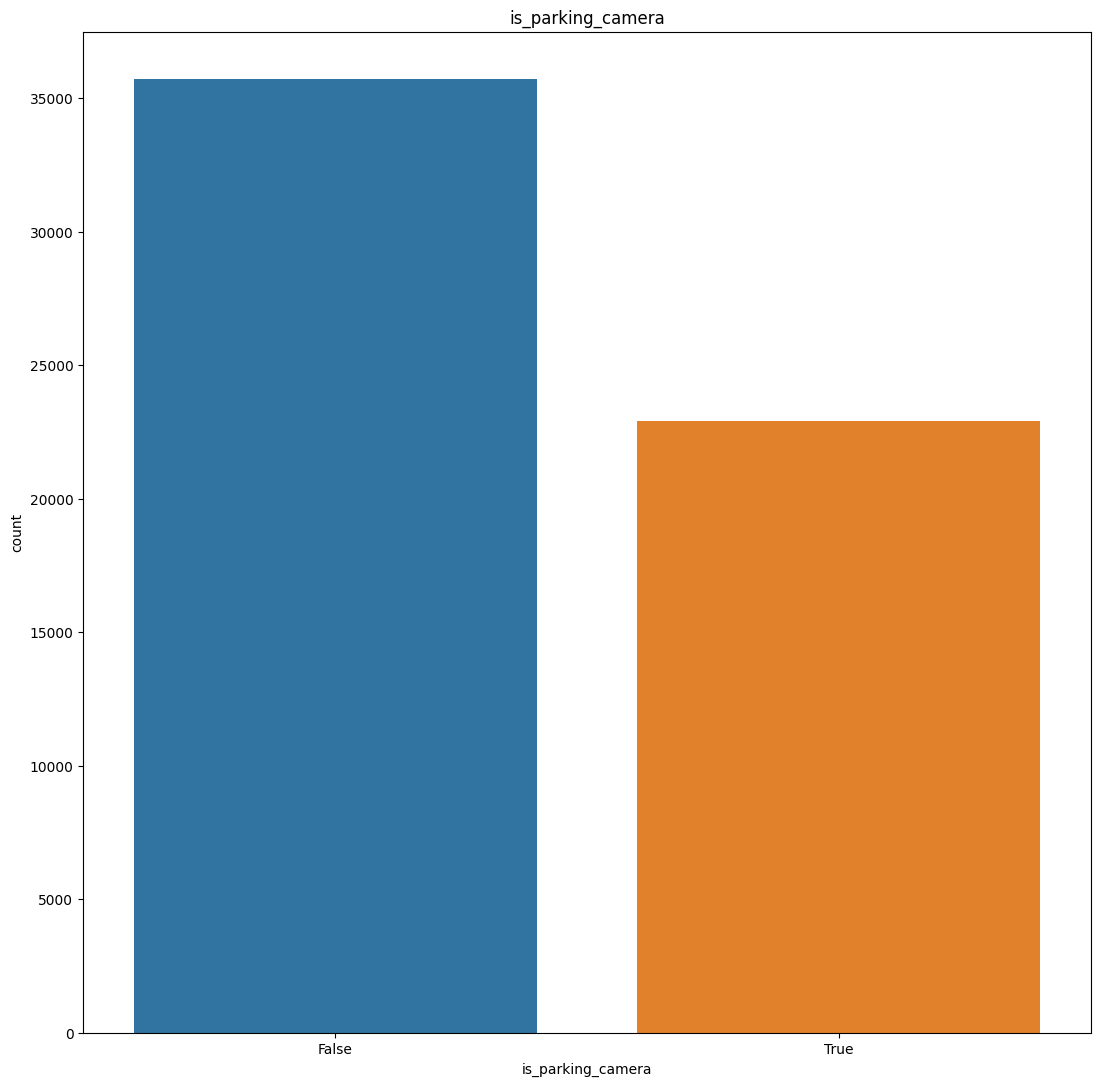

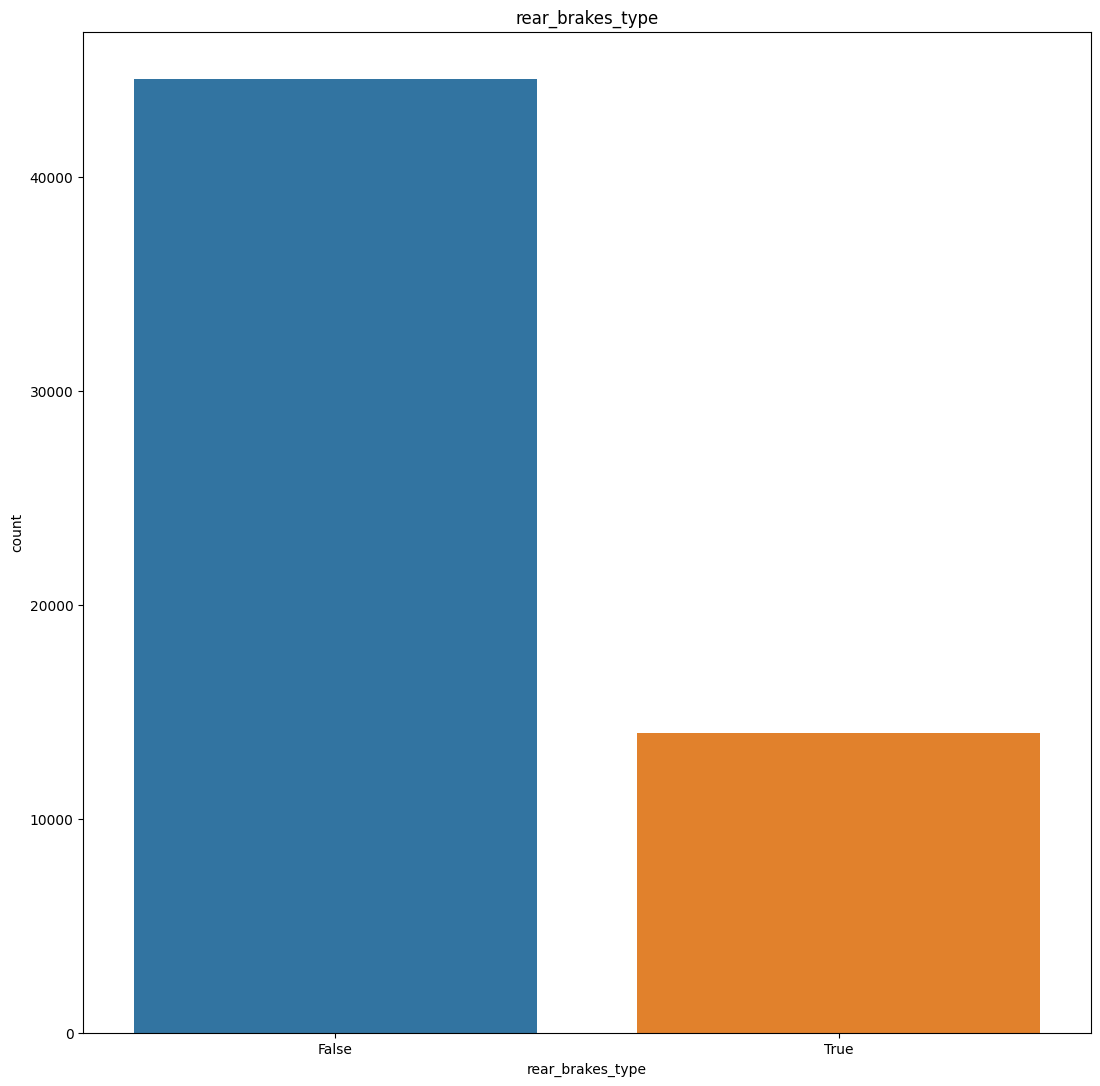

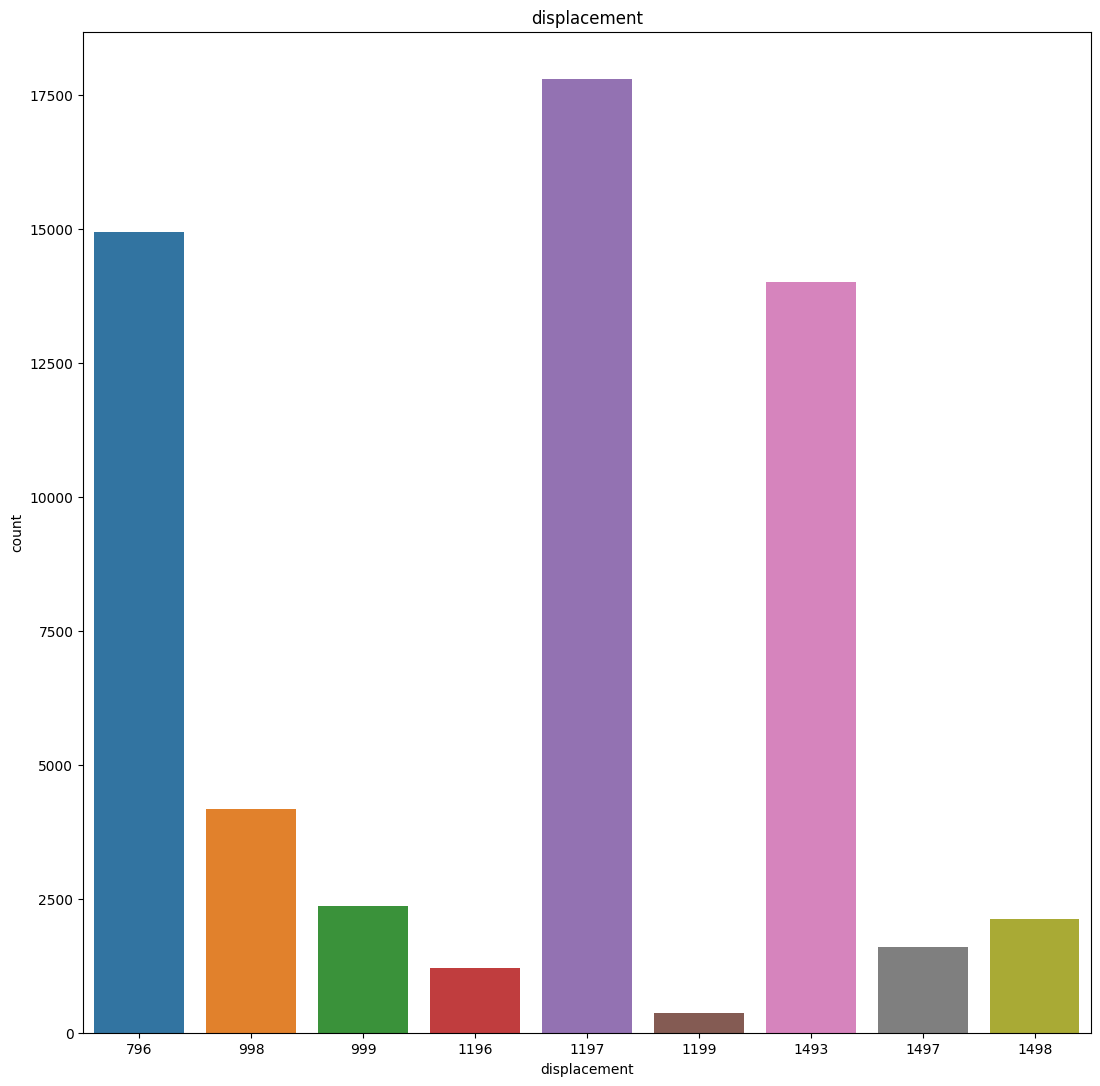

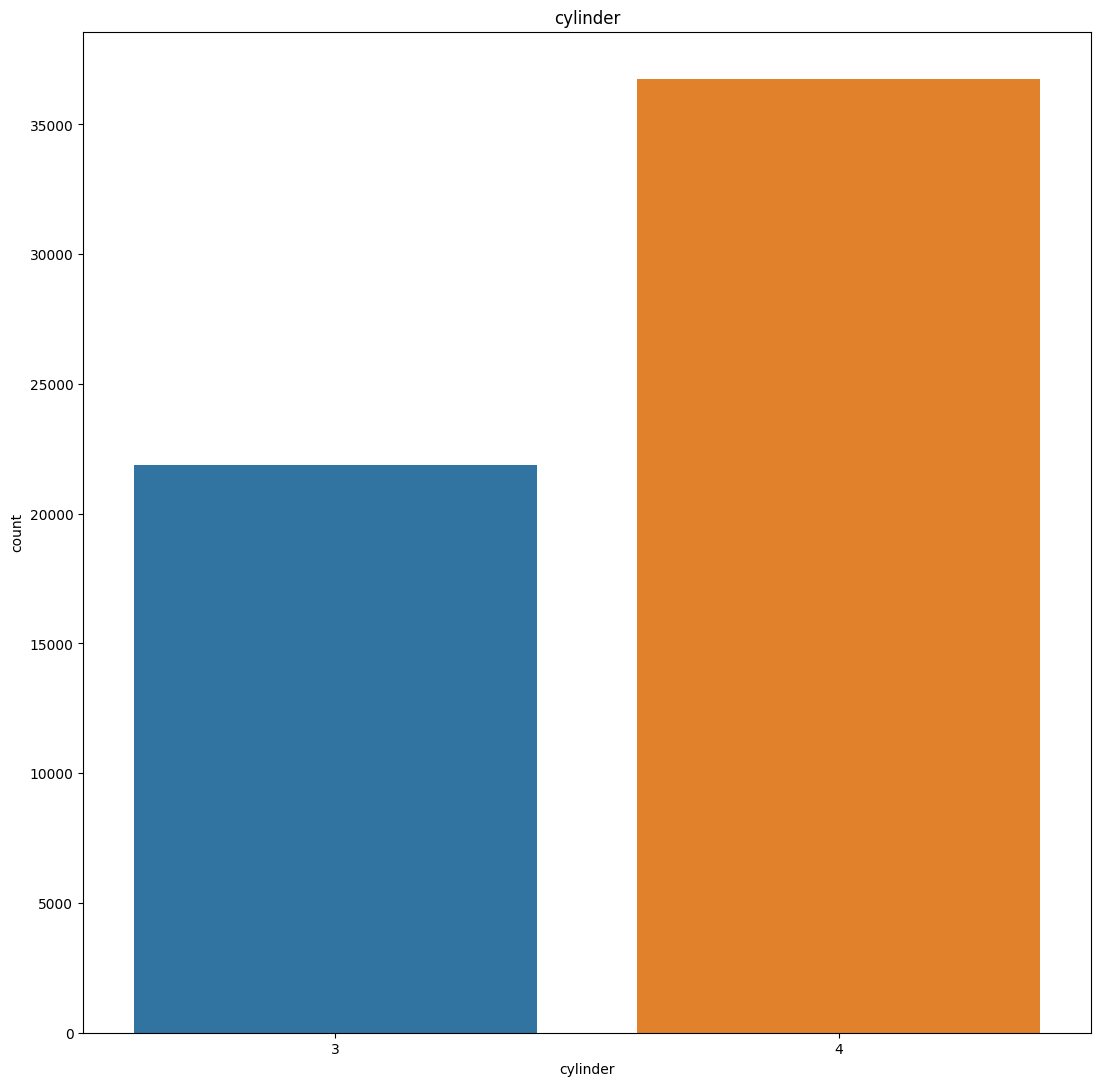

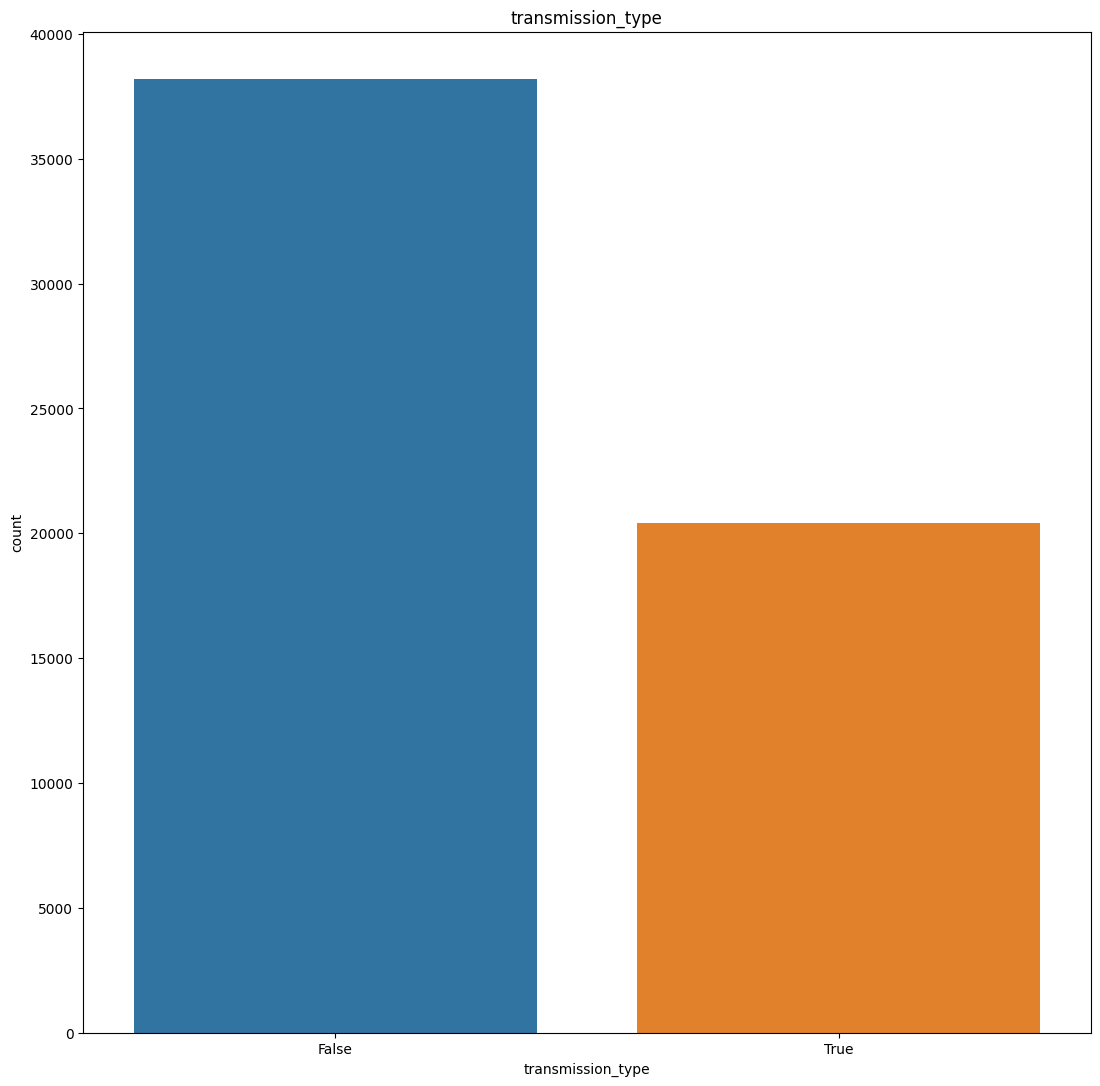

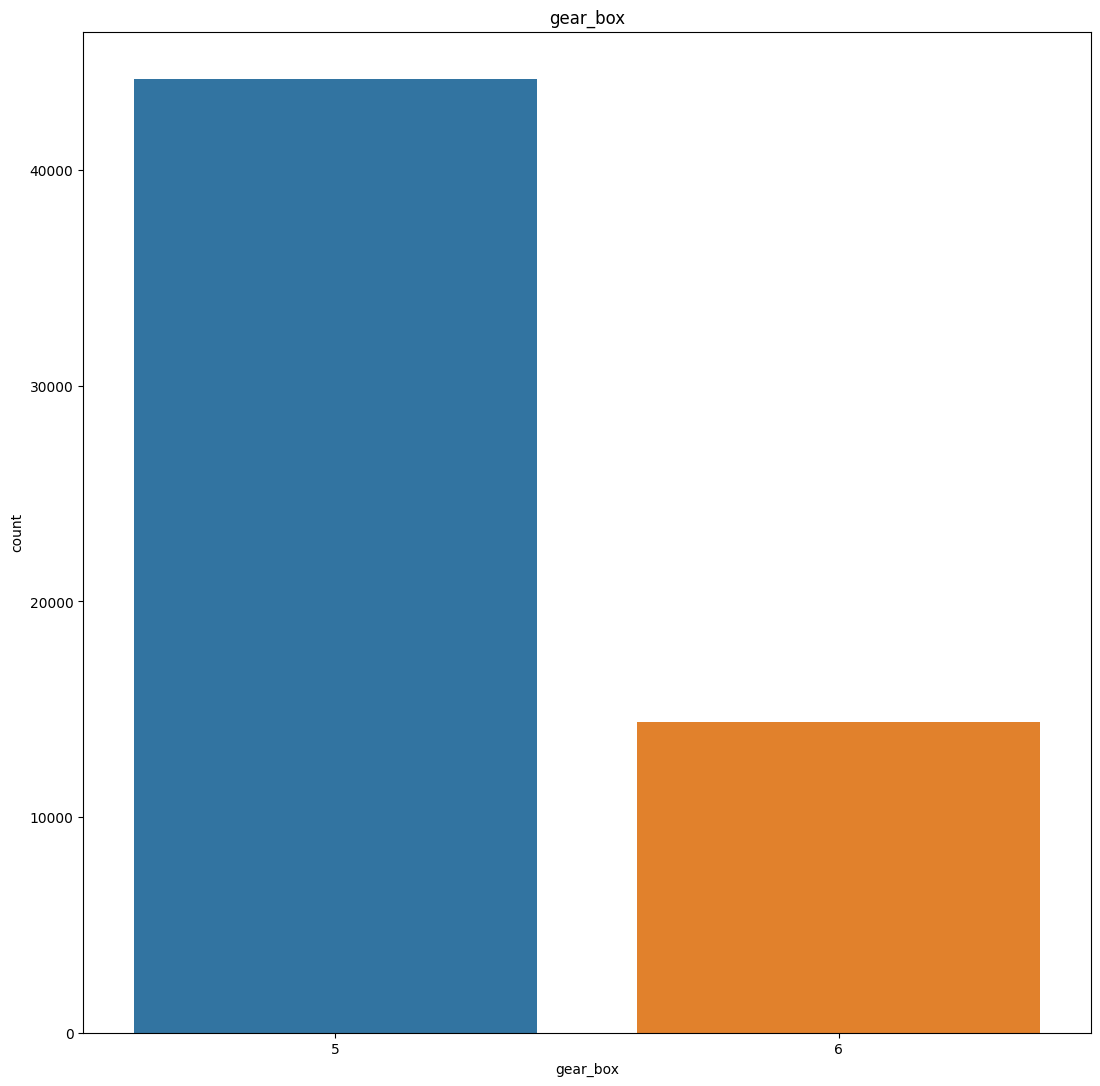

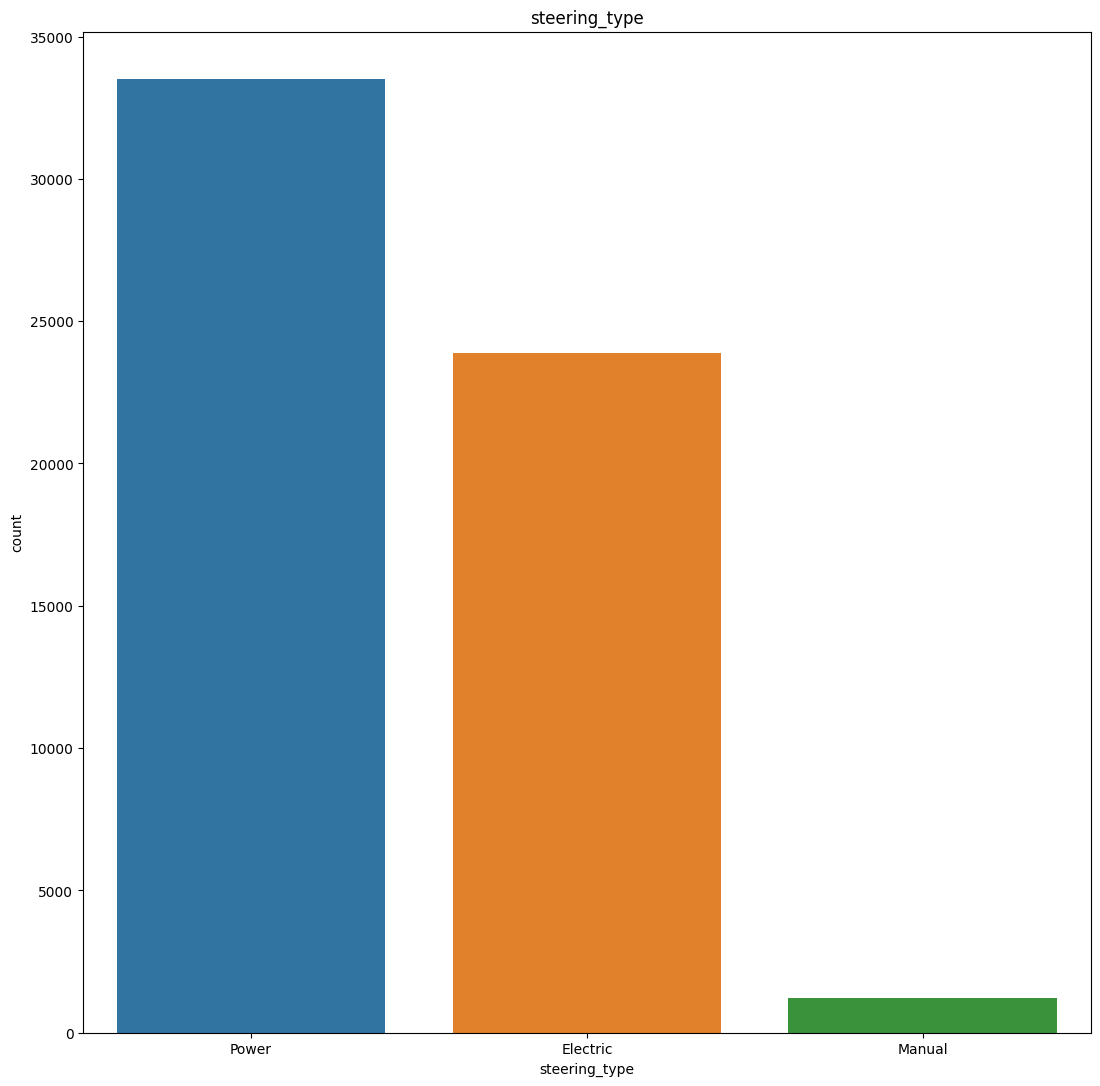

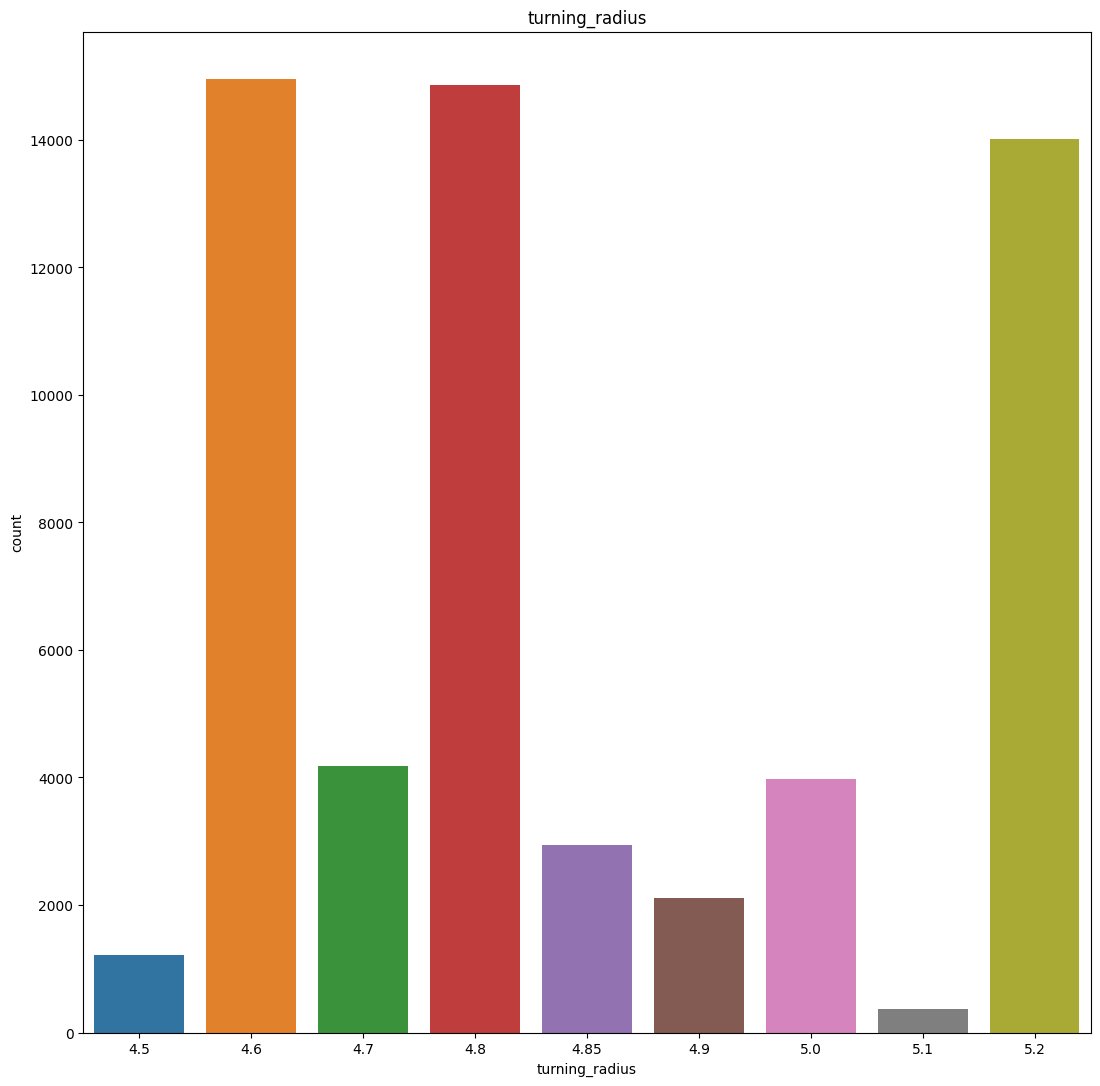

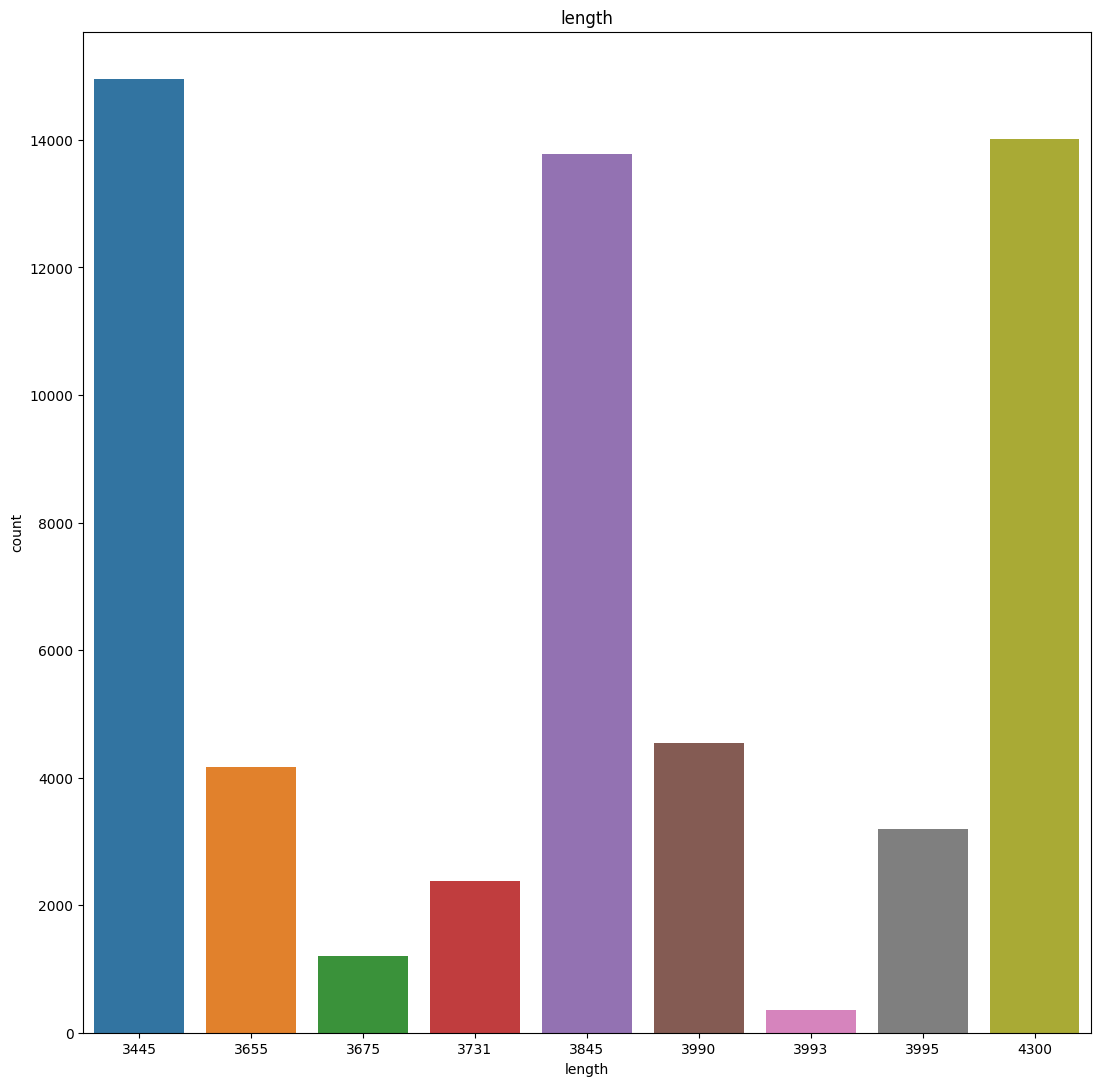

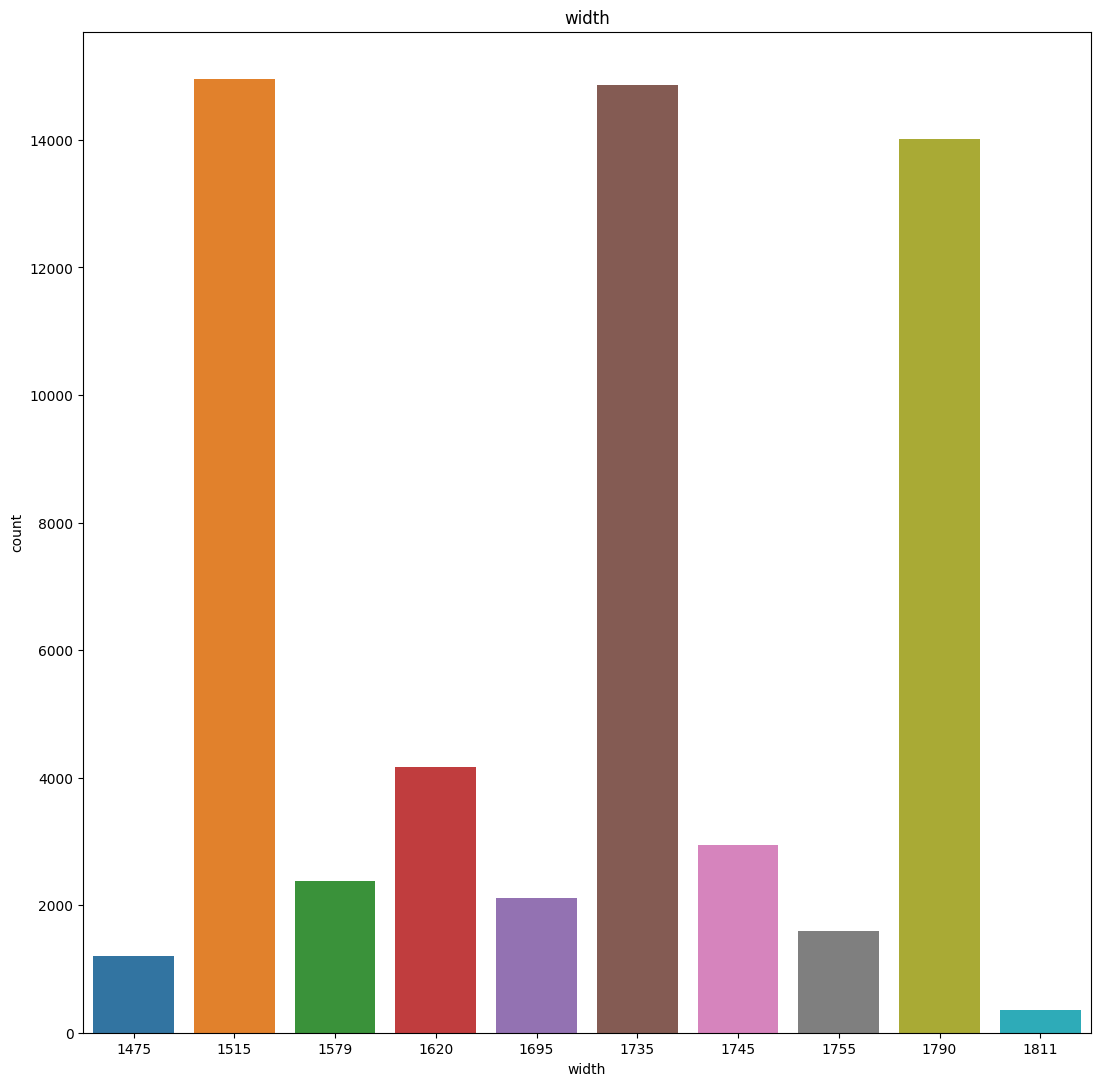

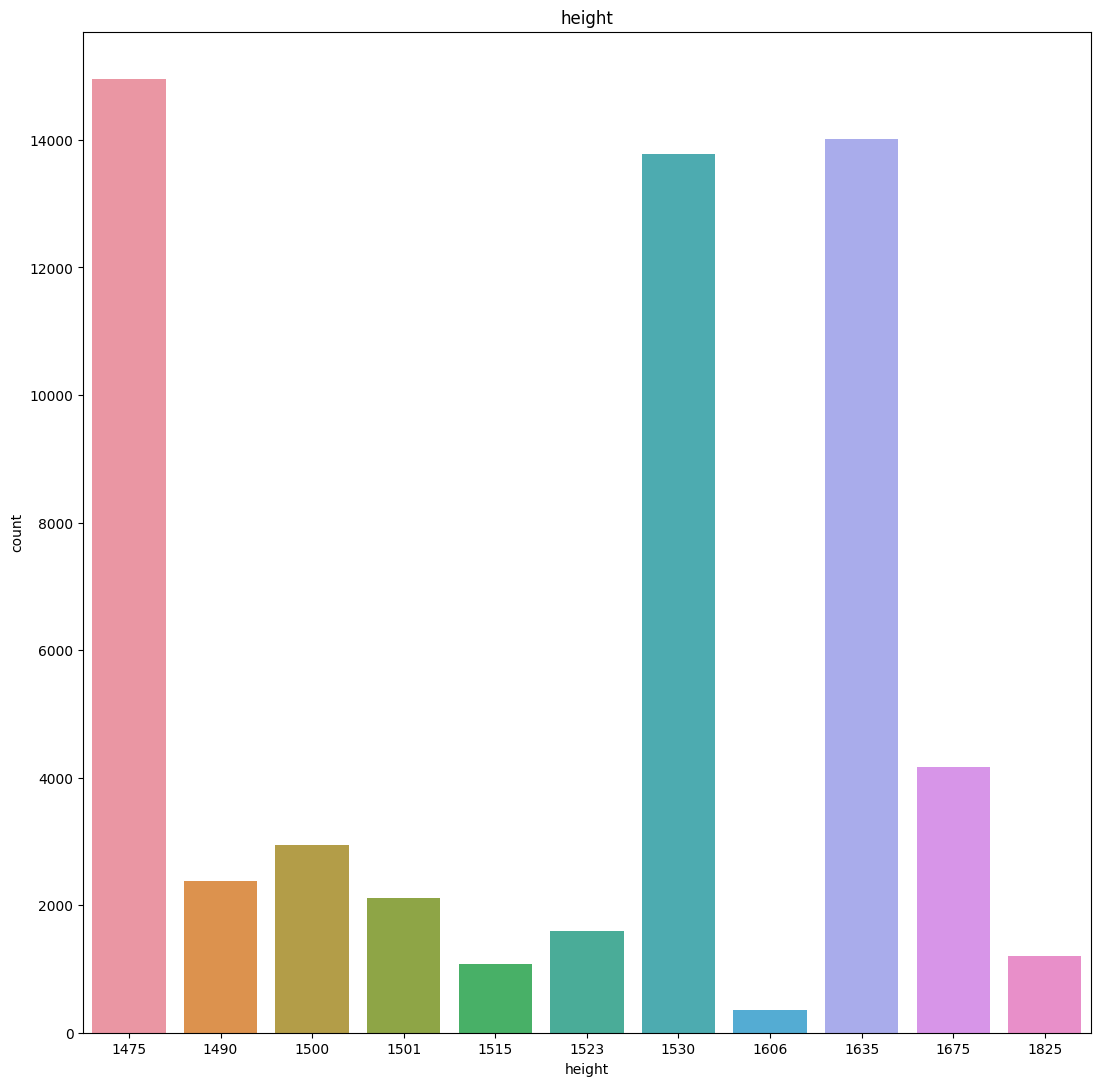

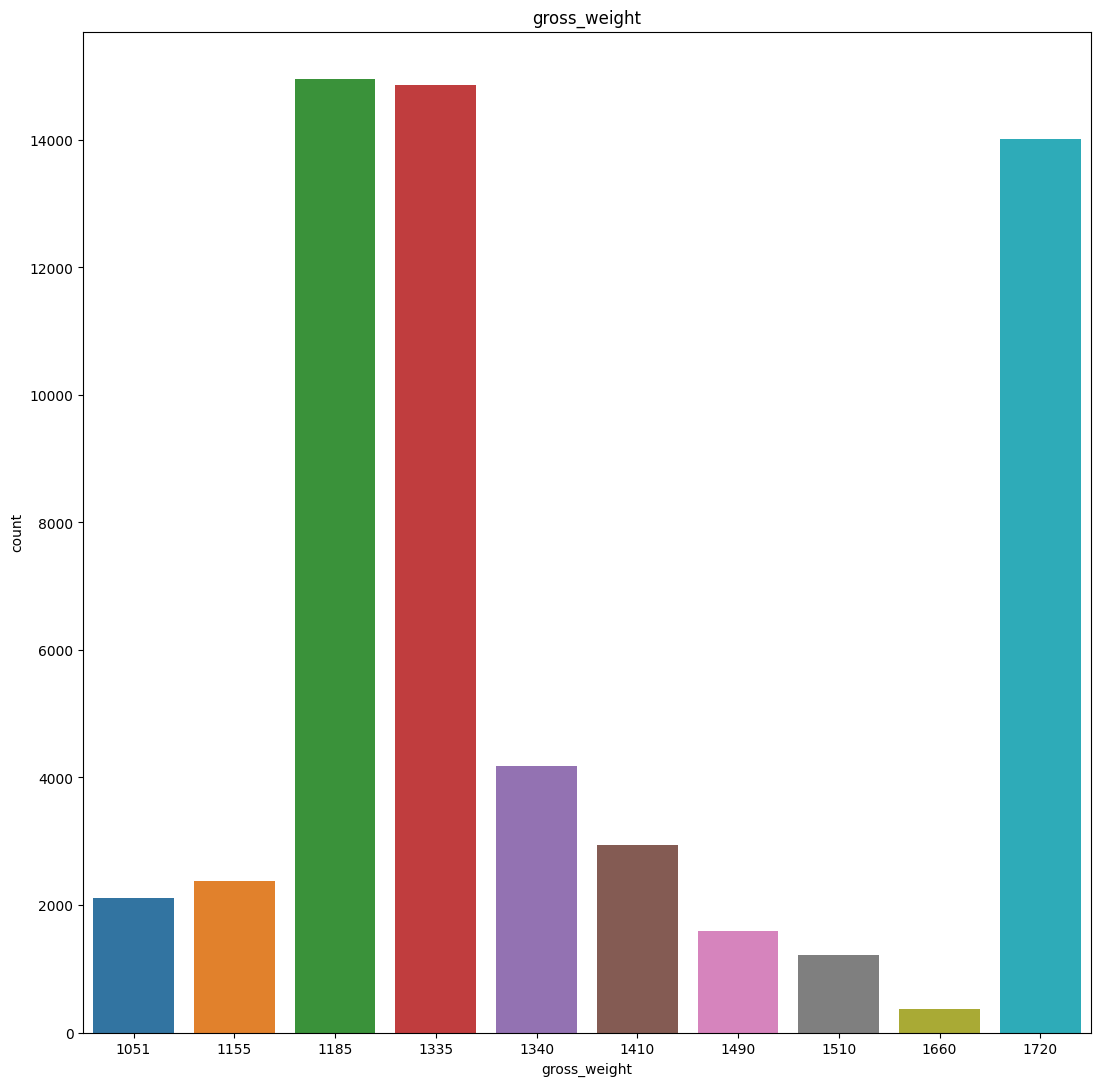

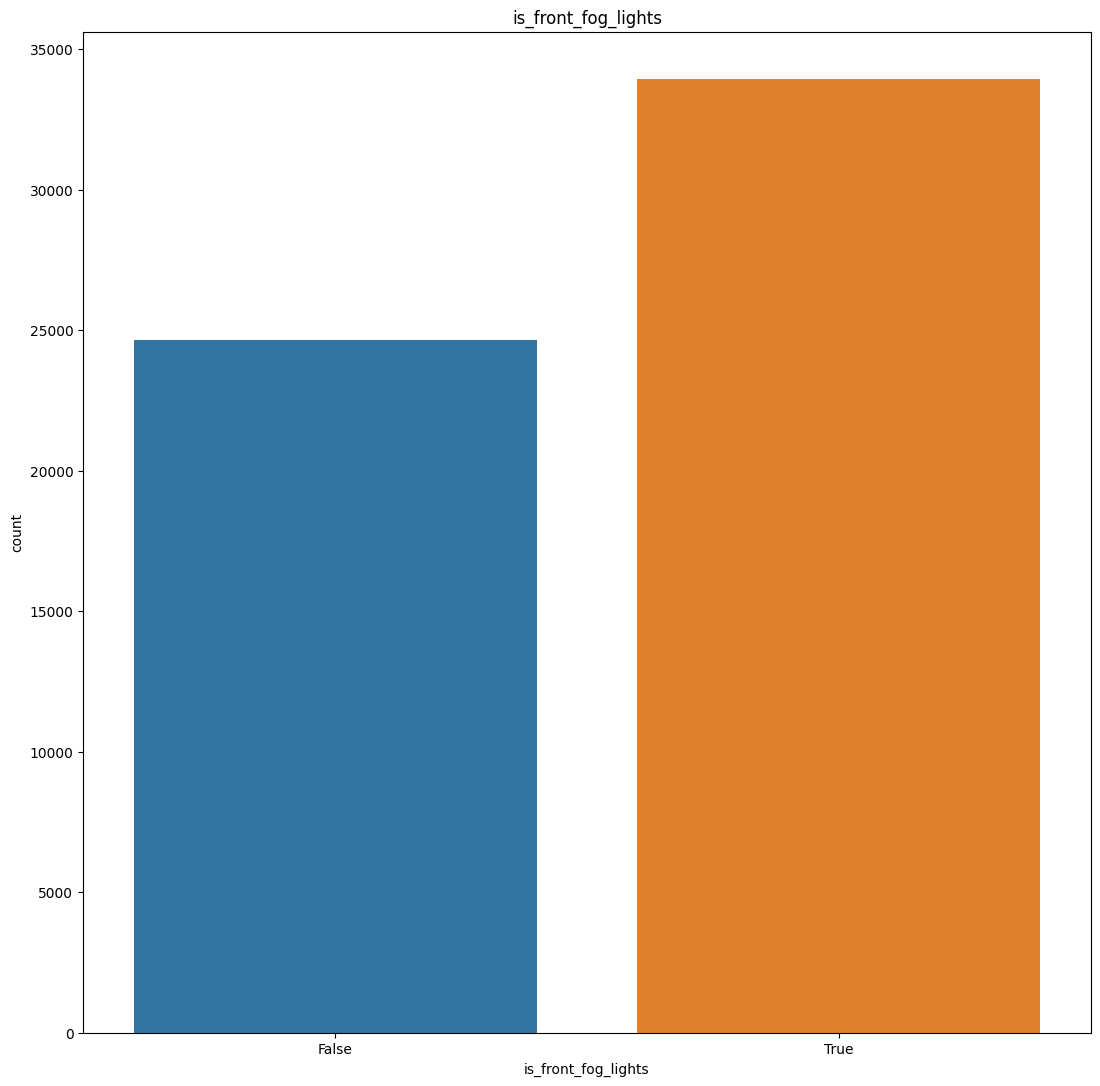

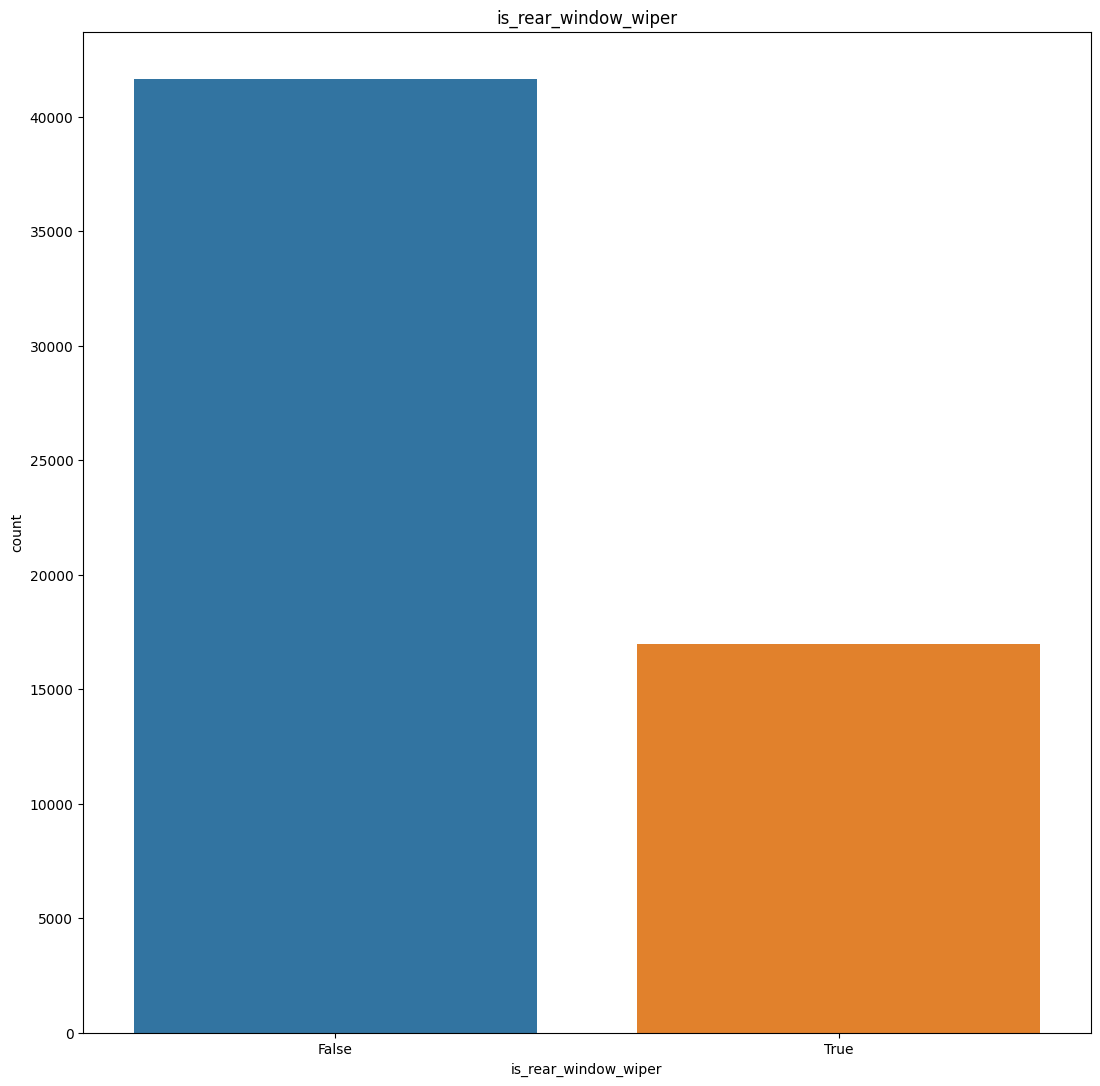

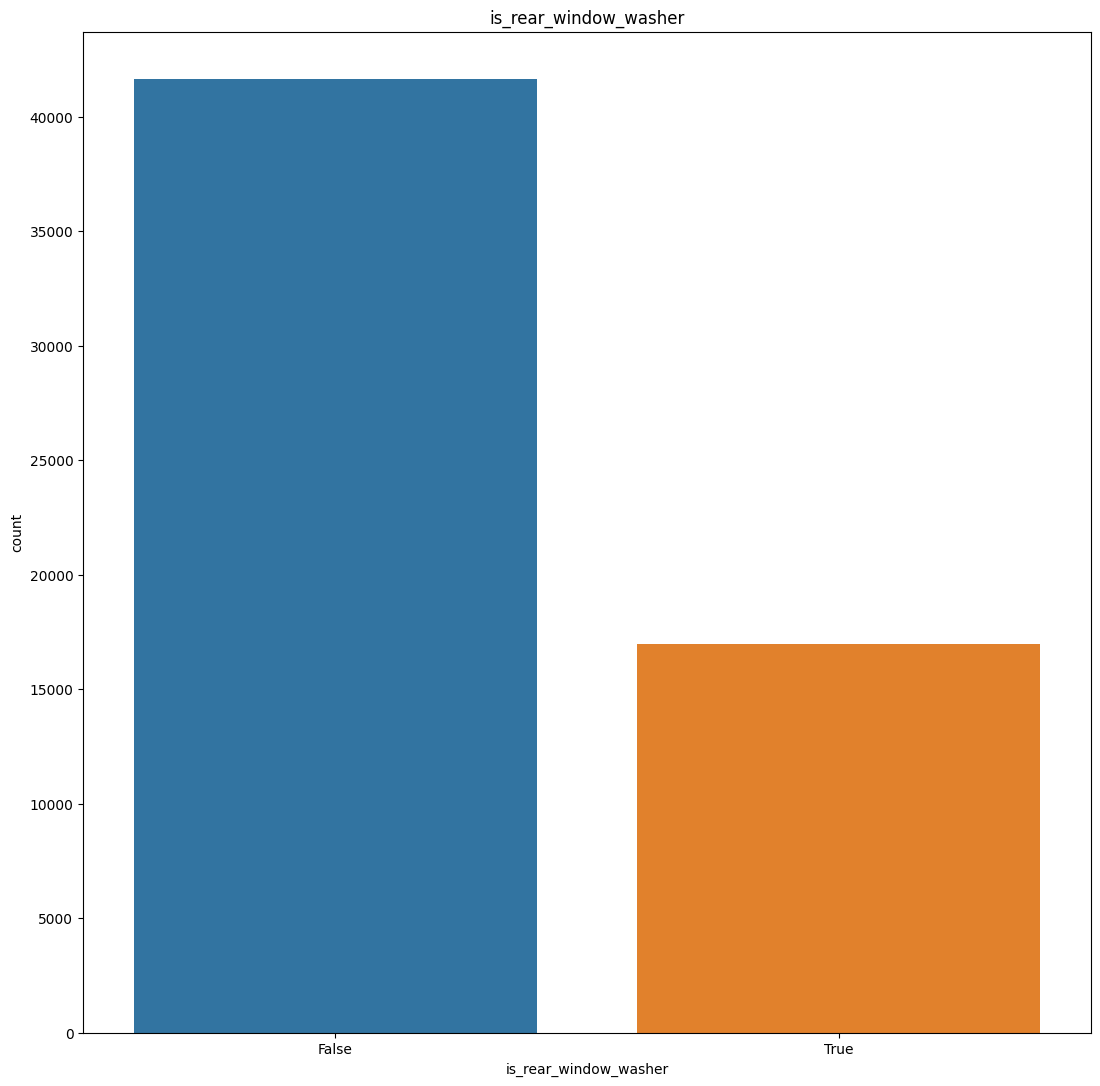

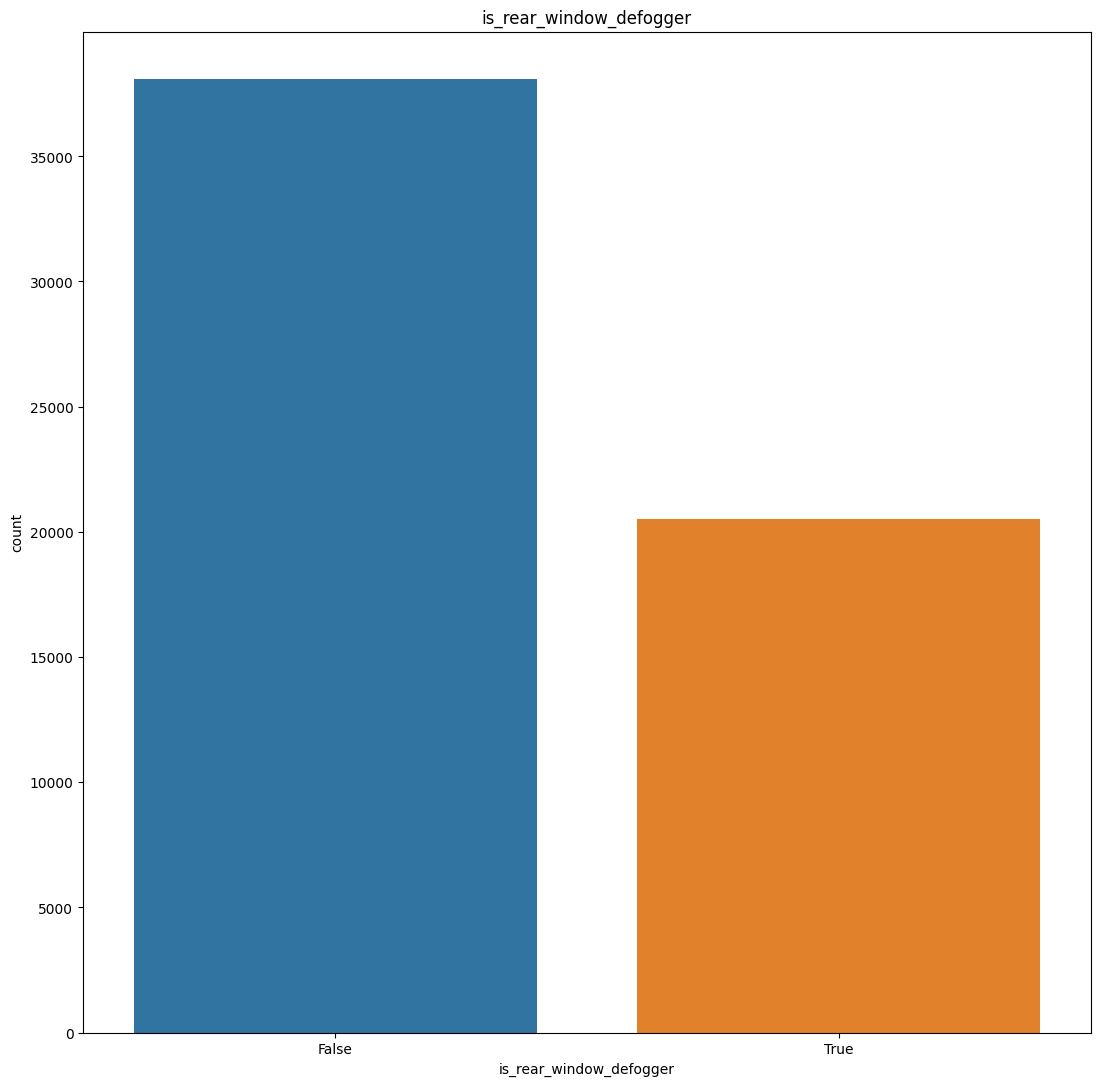

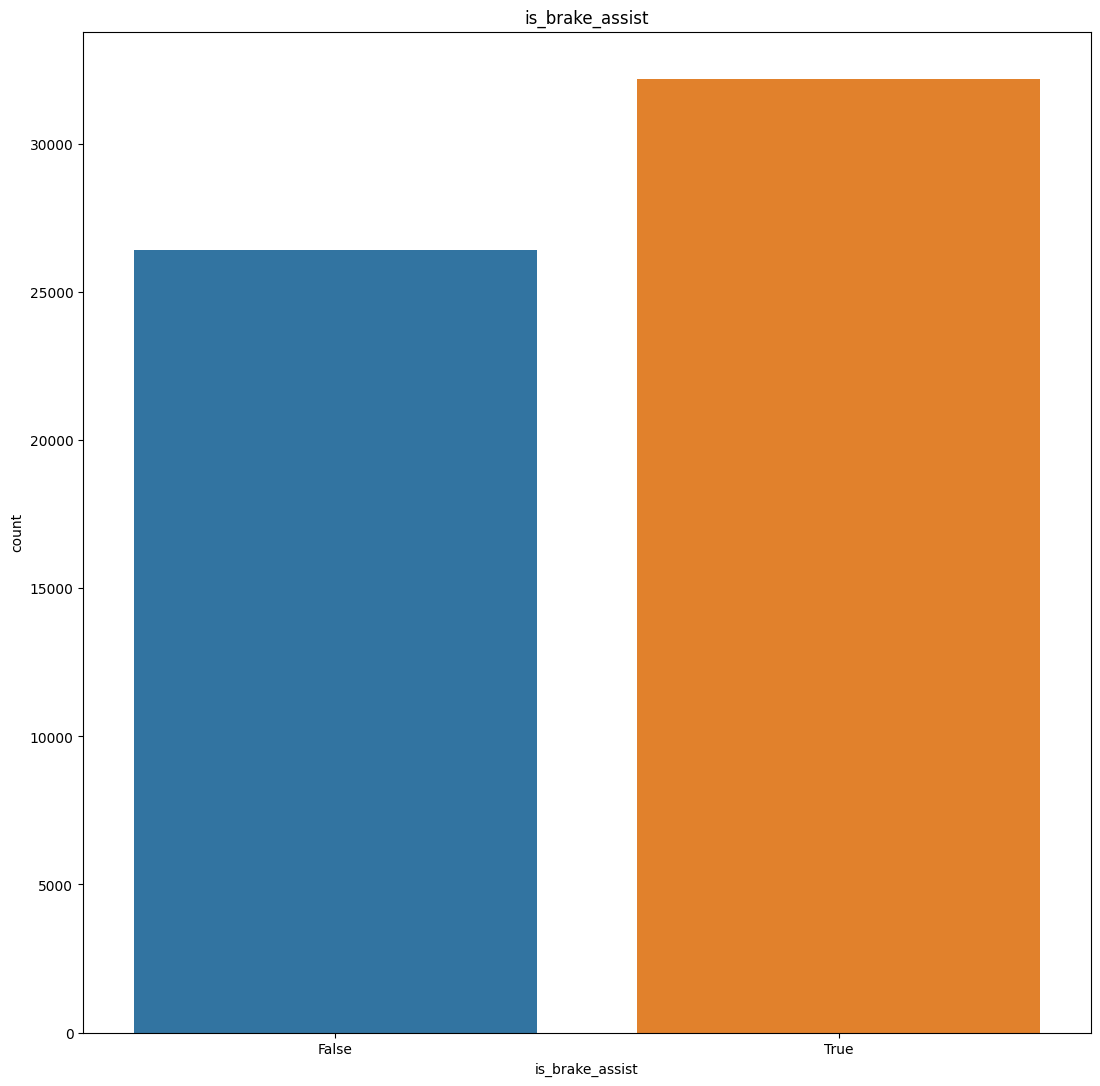

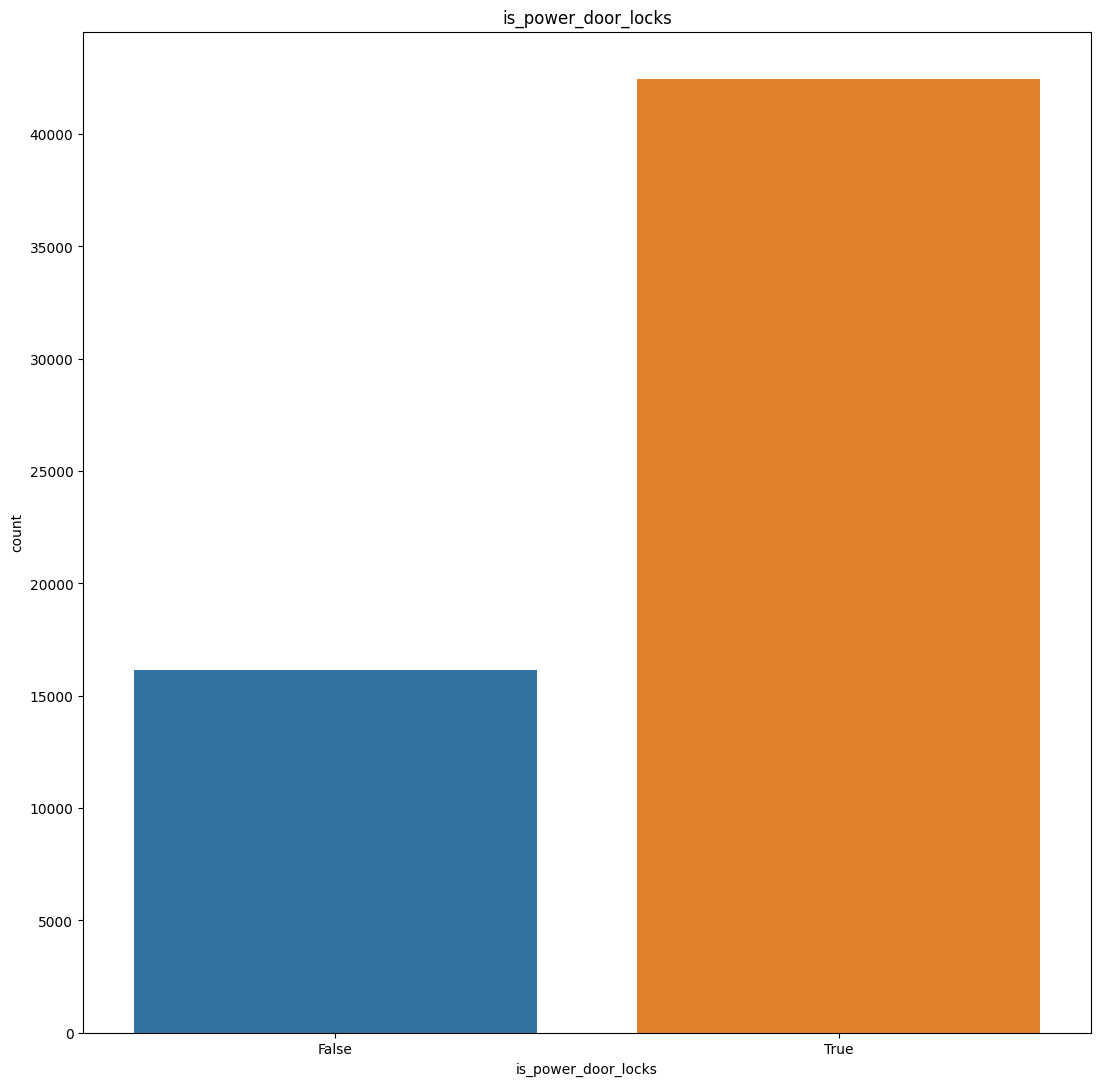

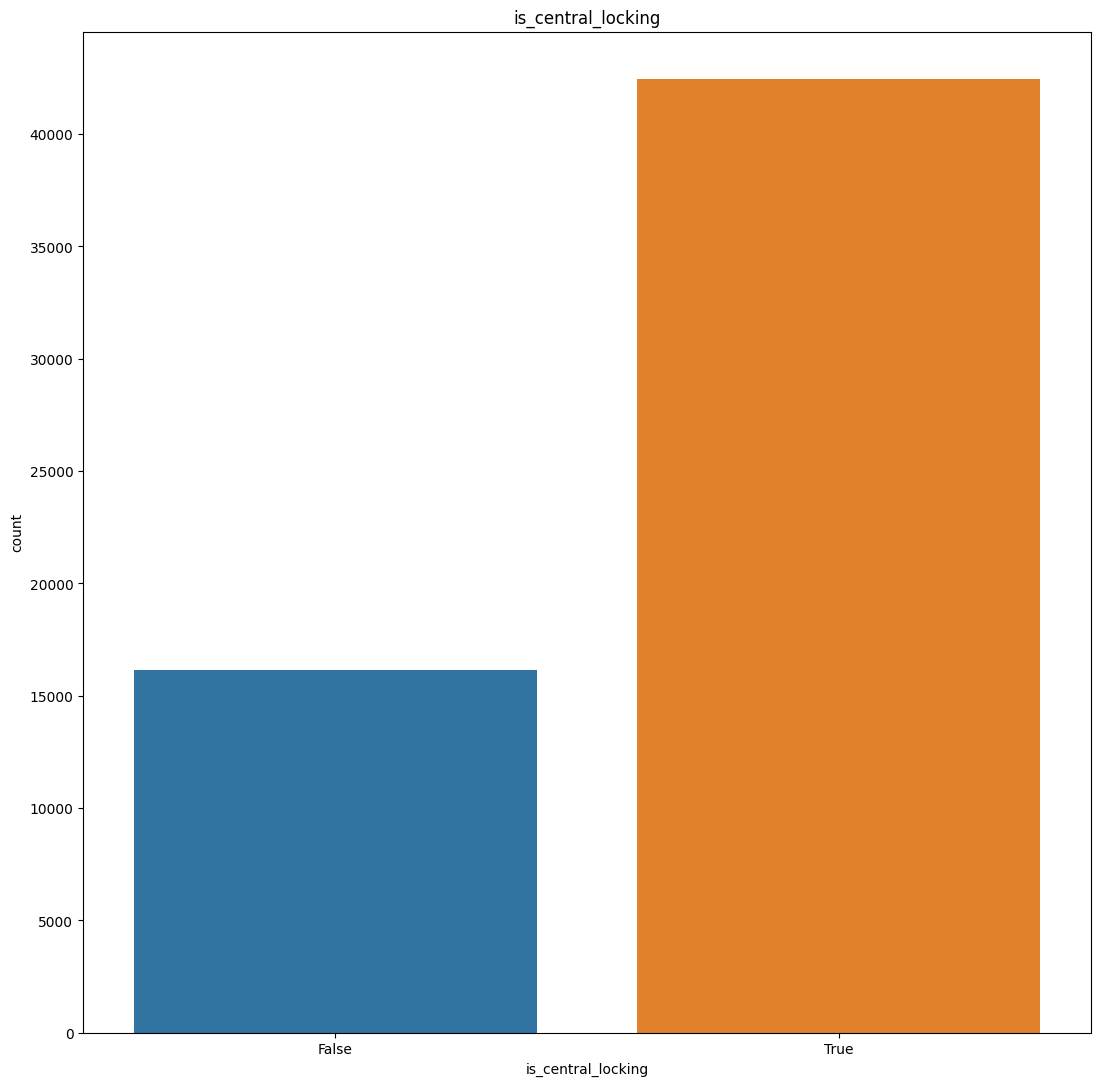

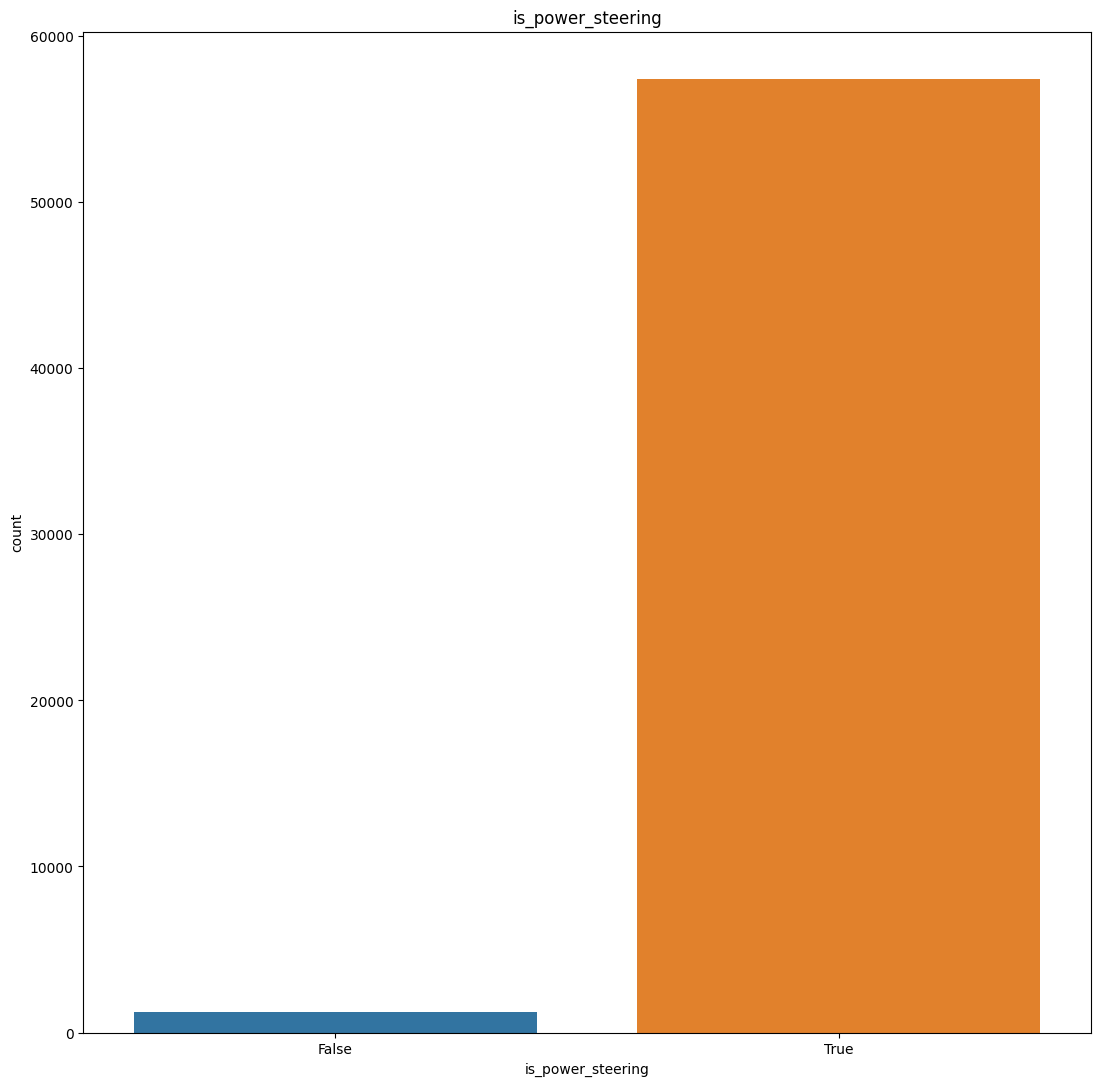

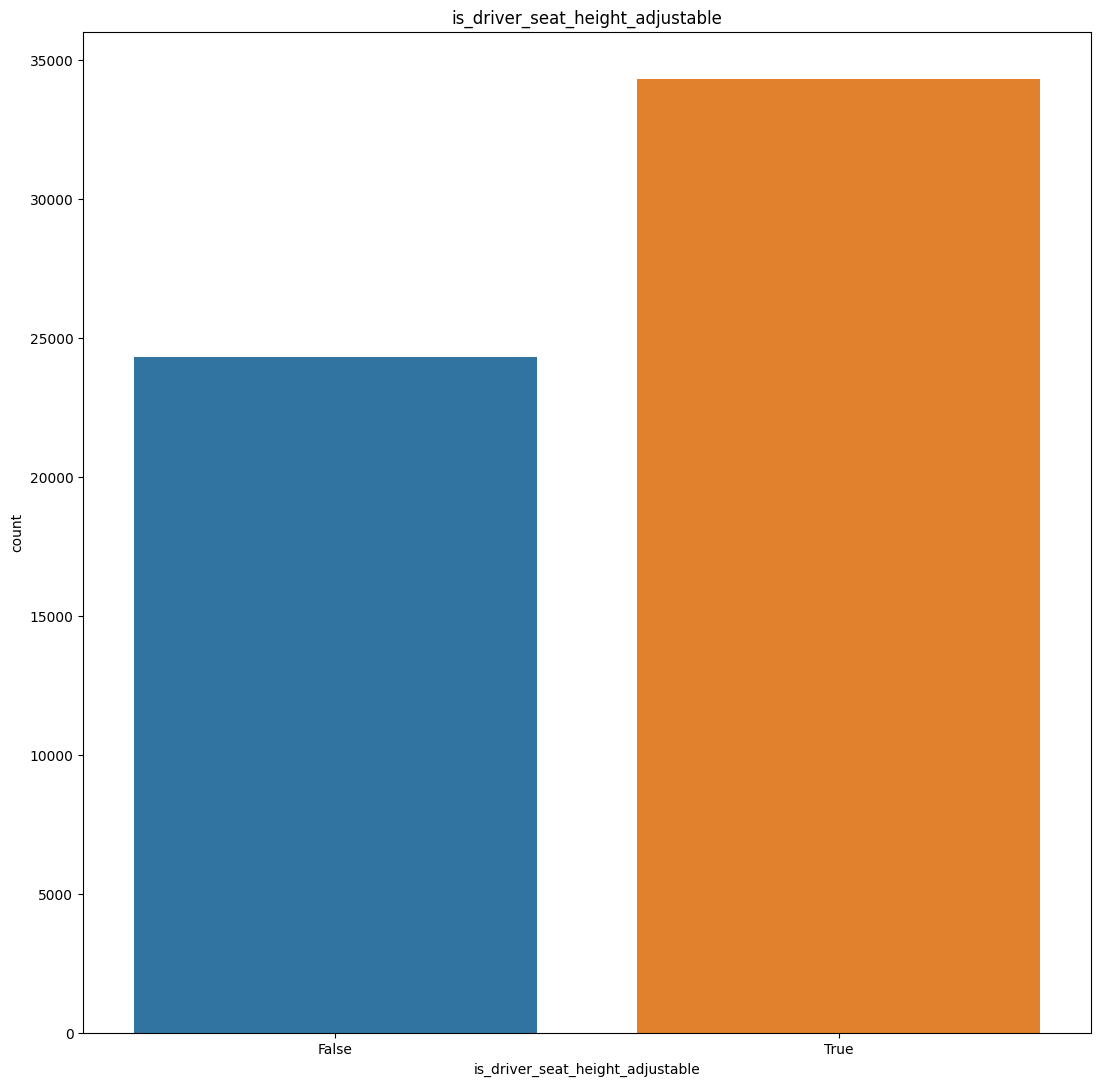

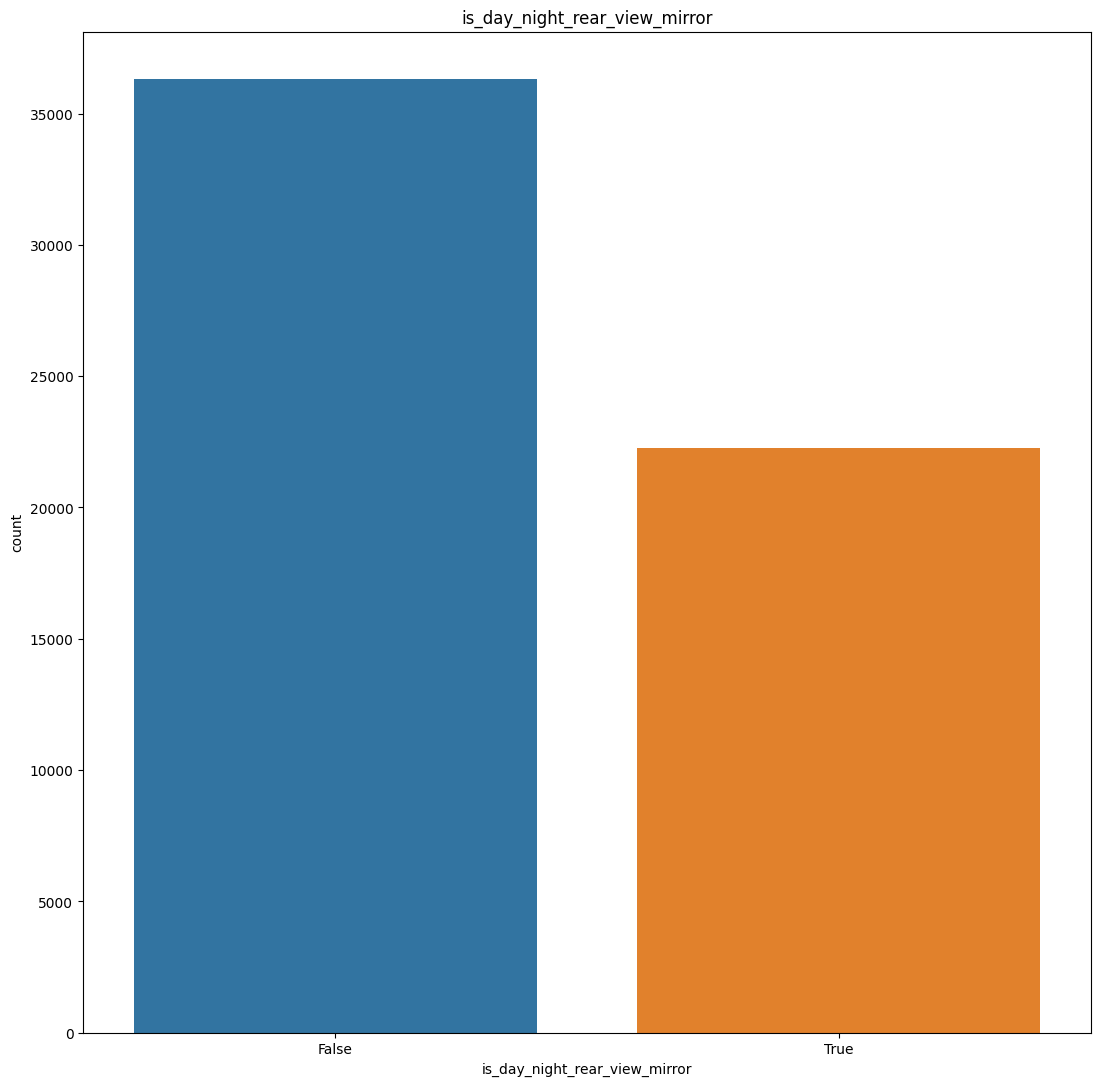

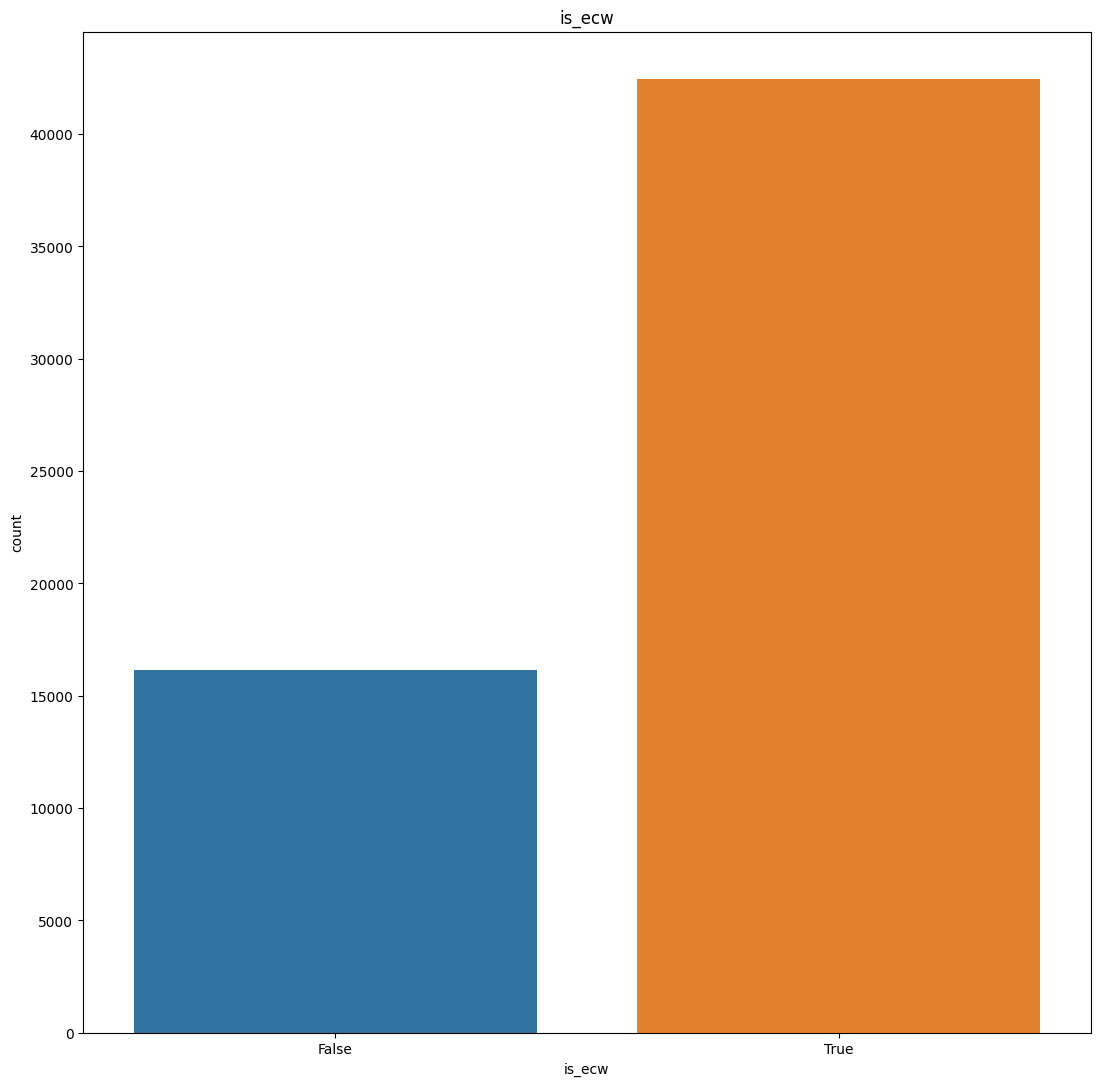

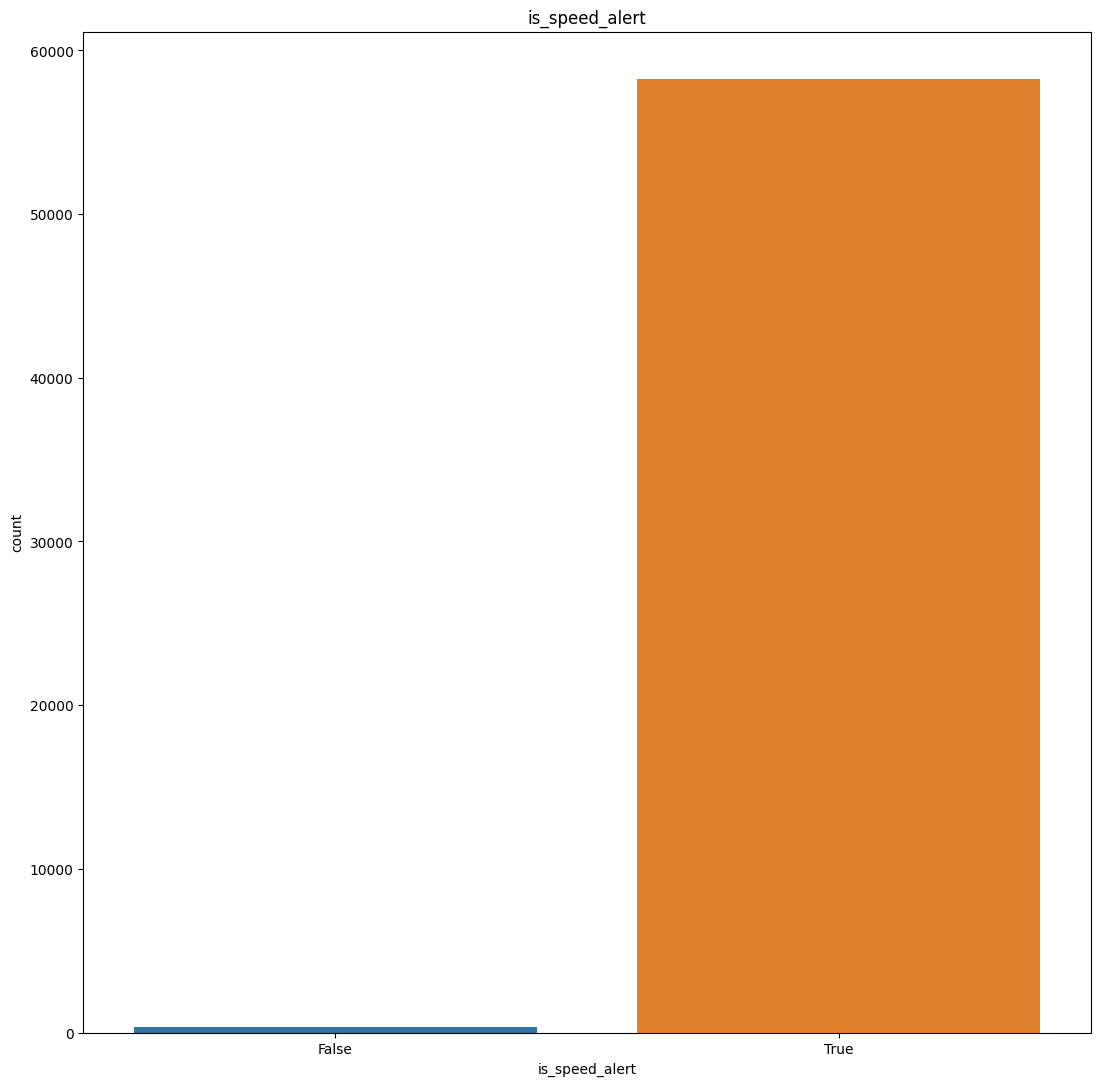

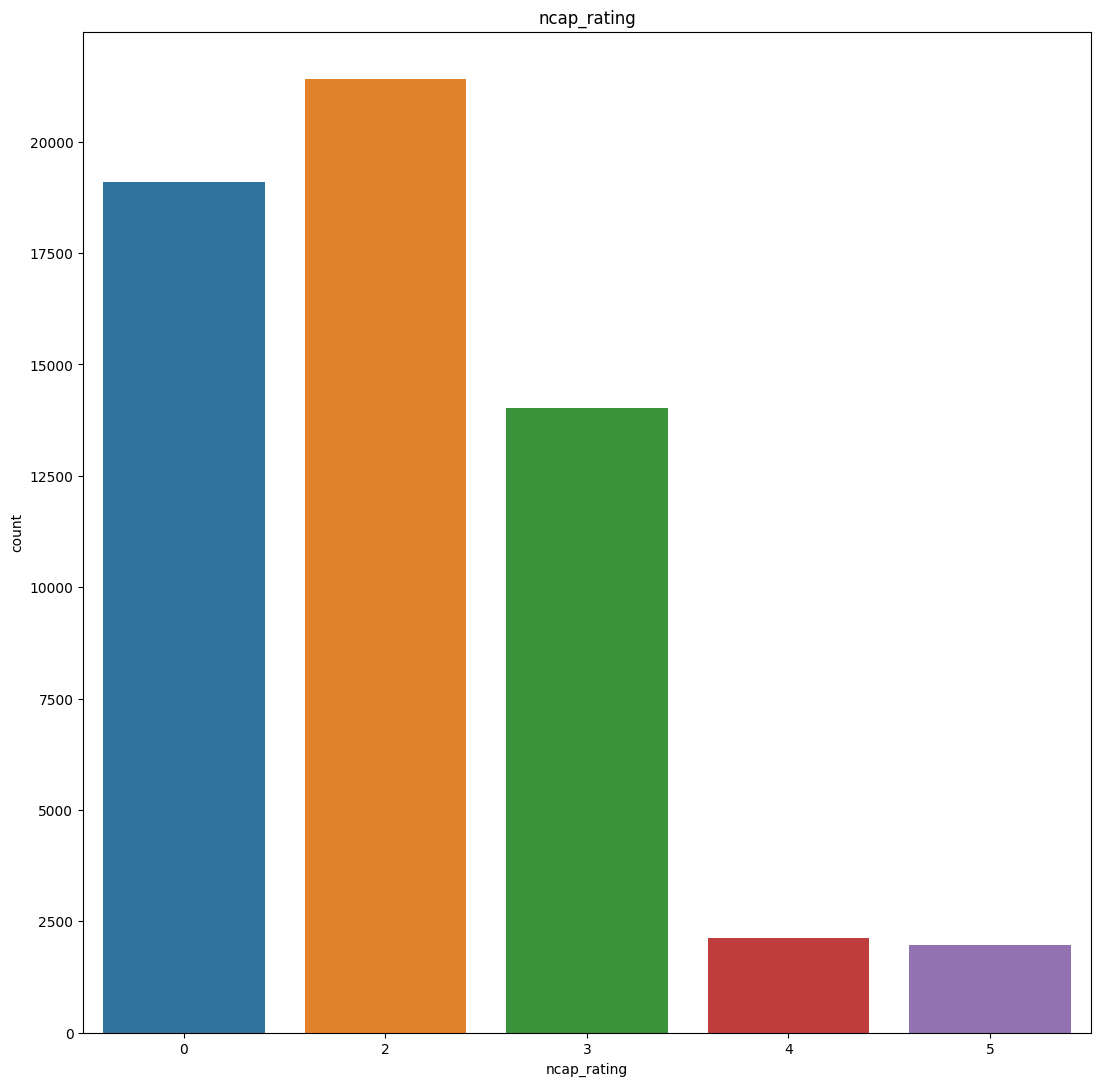

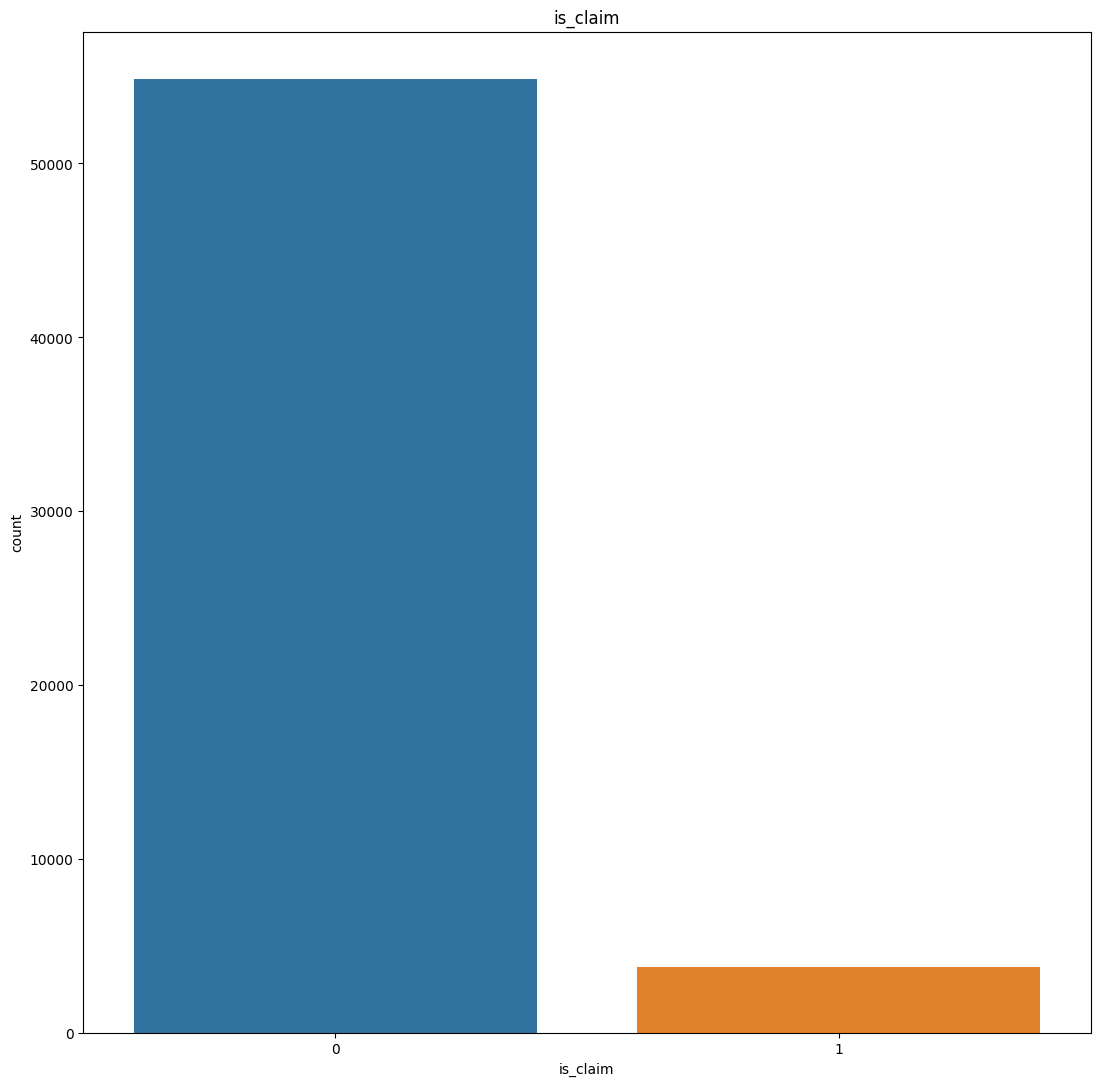

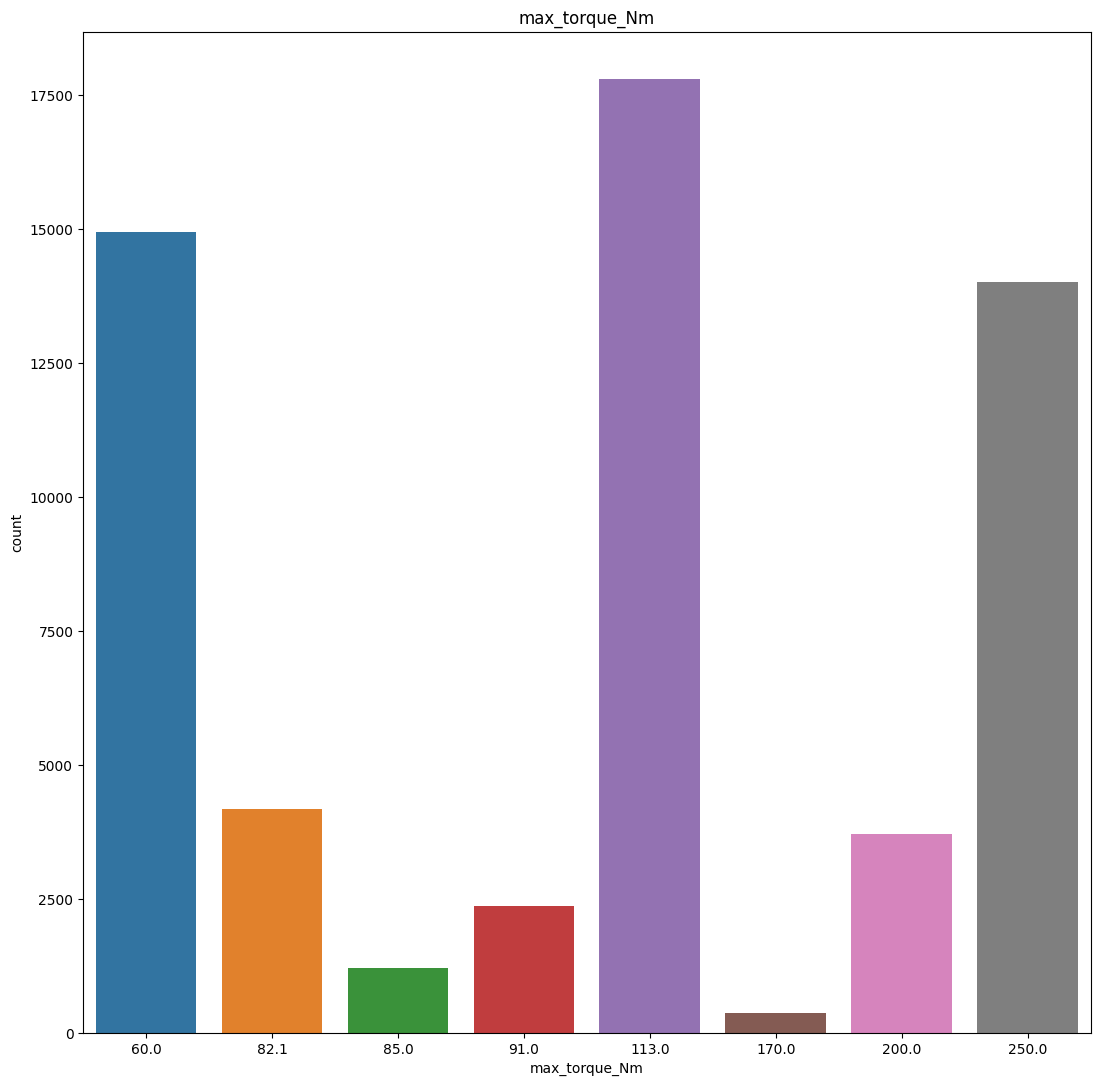

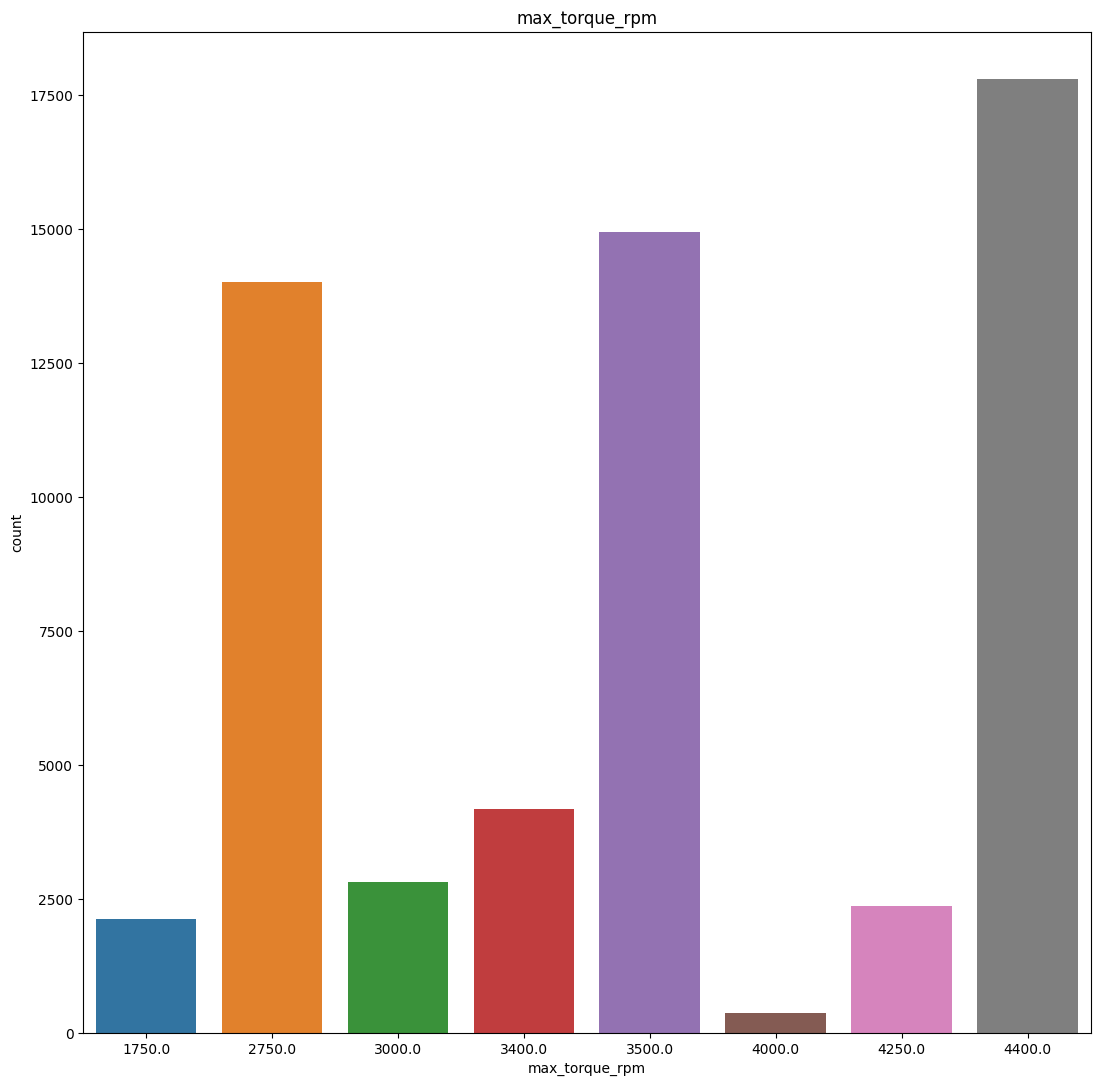

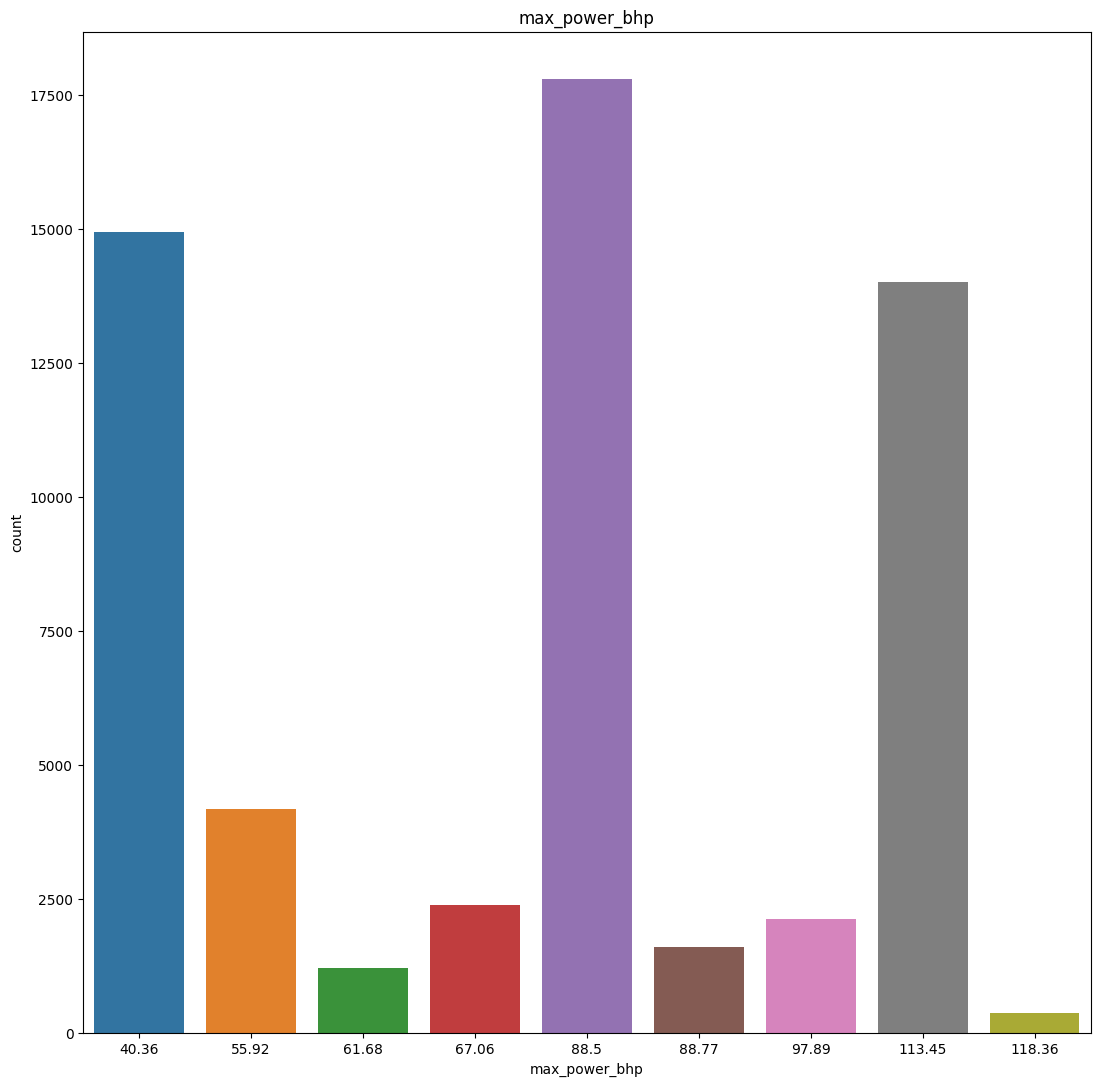

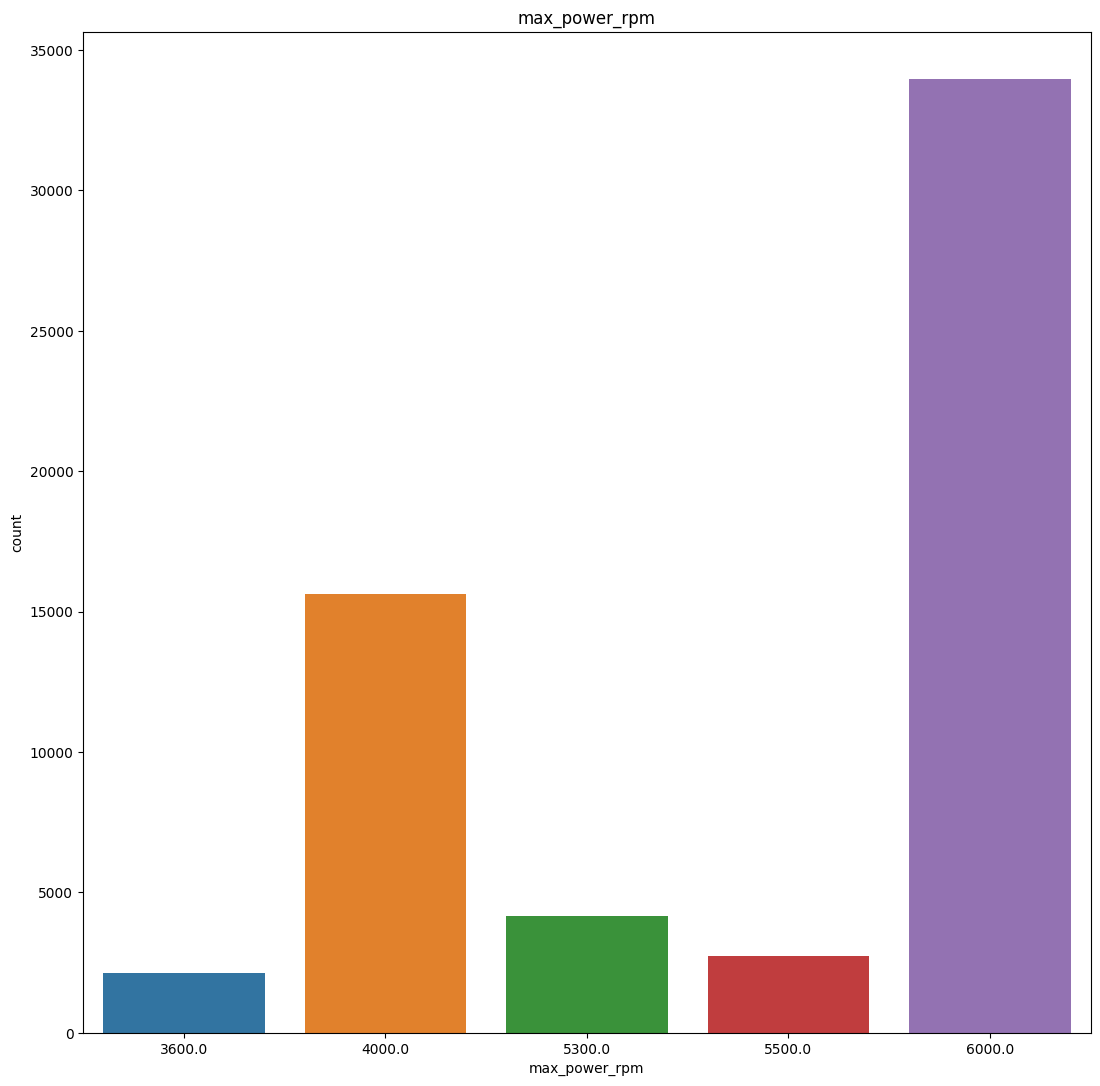

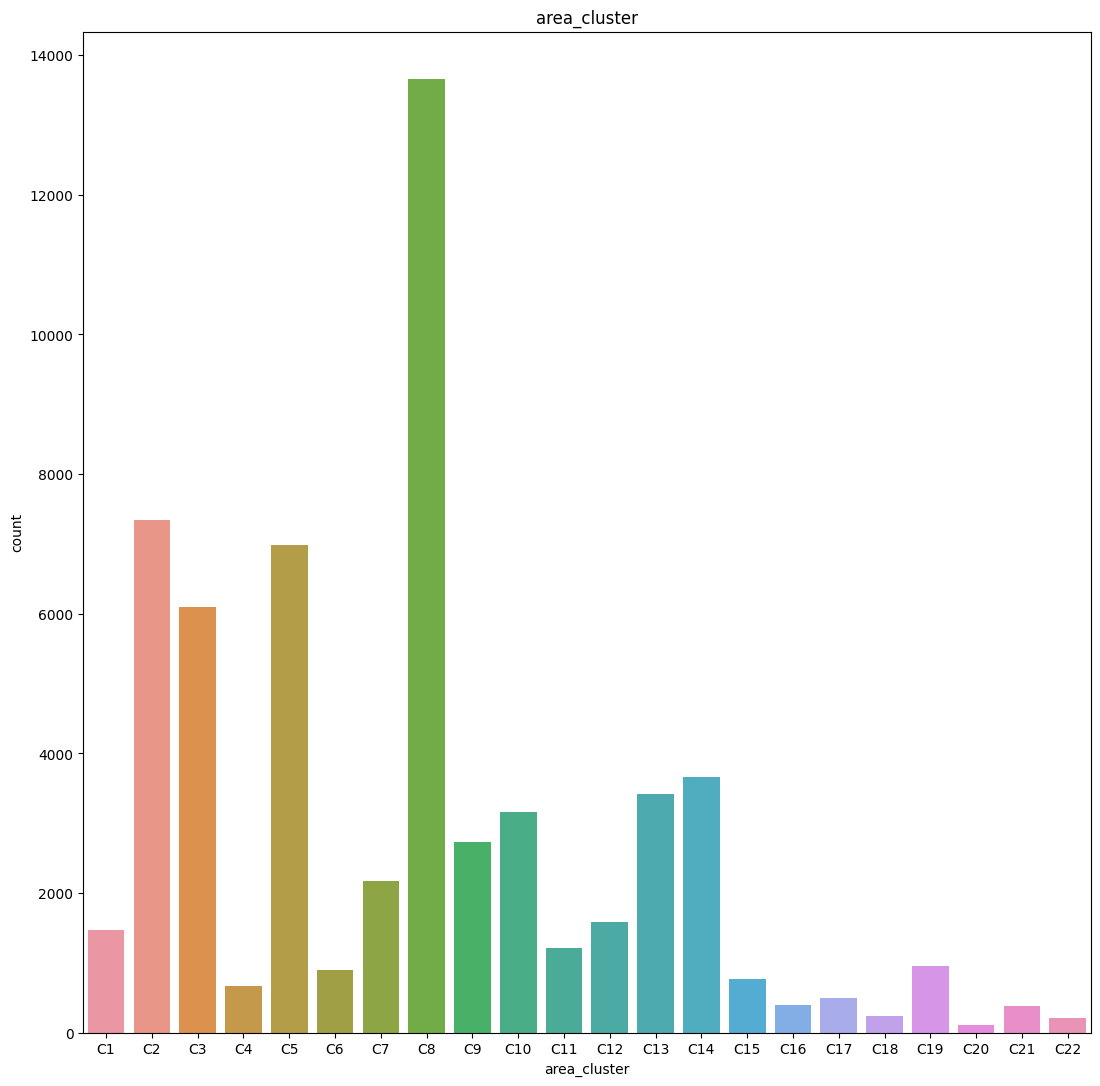

In [14]:
for i in cat_list:
    plt.figure(figsize=(13,13))
    sb.countplot(x=i,data=data.loc[:,cat_list])
    plt.title(i)

In [19]:
from sklearn.model_selection import train_test_split

inputs = categories_encoded_data.drop("is_claim", axis=1)
labels = categories_encoded_data['is_claim'].values

inputs_train, inputs_test, label_train, label_test = train_test_split(inputs,labels,test_size = 0.20)

Like we said previously, the data is skewed in terms of the label. This means we need to balance the data somehow. We'll try different method and see which yields better results:
<ul>
<li>Doing nothing at all</li>
<li>Random Oversampling</li>
<li>Random Undersampling</li>
<li>SMOTENC (Oversampling)</li>
<li>ENN (Undersampling)</li>
<li>SMOTEENN (Hybrid)</li>
</ul>

In [20]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler


ros = RandomOverSampler()
inputs_train_ros,label_train_ros = ros.fit_resample(inputs_train,label_train)

smote = SMOTE()
inputs_train_smote,label_train_smote = smote.fit_resample(inputs_train,label_train)

rus = RandomUnderSampler()
inputs_train_rus,label_train_rus = rus.fit_resample(inputs_train,label_train)


enn = EditedNearestNeighbours()
inputs_train_enn,label_train_enn = enn.fit_resample(inputs_train,label_train)


smoteenn = SMOTEENN()
inputs_train_smoteen,label_train_smoteen = smoteenn.fit_resample(inputs_train,label_train)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np
from sklearn.linear_model import Perceptron


clf_1 = KNeighborsClassifier()
clf_2 = DecisionTreeClassifier()

clf_3 = Sequential()
clf_3.add(Dense(64, activation='sigmoid', input_dim=inputs_train_smoteen.shape[1]))
clf_3.add(Dense(64, activation='sigmoid'))
clf_3.add(Dense(1, activation='sigmoid')) 
clf_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

clf_4 = GaussianNB()
clf_5 = Perceptron()

clf_list = [clf_1,clf_2,clf_3,clf_4,clf_5]

def apply_model_and_get_stats(model,x_train,y_train,x_test,y_test, is_neural_network):

    if is_neural_network:
        return
        x_train = np.array(x_train, dtype=np.float32)
        y_train = np.array(y_train, dtype=np.float32)
        x_test = np.array(x_test, dtype=np.float32)
        y_test = np.array(y_test, dtype=np.float32)

        x_train = tf.convert_to_tensor(x_train)
        y_train = tf.convert_to_tensor(y_train)
        x_test = tf.convert_to_tensor(x_test)
        y_test = tf.convert_to_tensor(y_test)
        
        clf.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


        y_pred = model.predict(x_test)
        y_pred = (y_pred > 0.5)
    
    else:
        # Make predictions on the test data
        y_pred = model.predict(x_test)
    

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='binary')

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='binary')

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='binary')

    # Print the results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    return y_pred

balancing_algorithms = [(inputs_train, label_train), (inputs_train_ros, label_train_ros), (inputs_train_rus, label_train_rus),
(inputs_train_smote,label_train_smote), (inputs_train_enn,label_train_enn ),(inputs_train_smoteen,label_train_smoteen)]
balancing_algorithm_str = ["nothing","Random Oversampling", "Random Undersampling", "smote","enn","smoteenn"]

for index,balancing_algorithm in enumerate(balancing_algorithms):
    inputs,label = balancing_algorithm
    print(balancing_algorithm_str[index])
    for index2,clf in enumerate(clf_list):
        print(clf)
        print(index2==2)
        if(index2!=2):
            clf.fit(inputs,label)
        y_pred = apply_model_and_get_stats(clf,inputs,label,inputs_test,label_test,index2==2)
        print()
        print()
    print()
    print()
    print()

nothing
KNeighborsClassifier()
False
Accuracy: 0.9344653980715079
Precision: 0.0625
Recall: 0.002702702702702703
F1-score: 0.0051813471502590676


DecisionTreeClassifier()
False
Accuracy: 0.87251471968598
Precision: 0.08388520971302428
Recall: 0.10270270270270271
F1-score: 0.09234507897934388


True


GaussianNB()
False


c:\Users\Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9368546804334841
Precision: 0.0
Recall: 0.0
F1-score: 0.0


Perceptron()
False
Accuracy: 0.9358307022783514
Precision: 0.07142857142857142
Recall: 0.0013513513513513514
F1-score: 0.0026525198938992045





Random Oversampling
KNeighborsClassifier()
False
Accuracy: 0.788036521887533
Precision: 0.07628765792031098
Recall: 0.21216216216216216
F1-score: 0.1122230164403145


DecisionTreeClassifier()
False
Accuracy: 0.8807065449270416
Precision: 0.0782051282051282
Recall: 0.08243243243243244
F1-score: 0.08026315789473686


True


GaussianNB()
False
Accuracy: 0.4180390818329209
Precision: 0.0676905574516496
Recall: 0.6432432432432432
F1-score: 0.1224909933093155


Perceptron()
False


c:\Users\Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9368546804334841
Precision: 0.0
Recall: 0.0
F1-score: 0.0





Random Undersampling
KNeighborsClassifier()
False
Accuracy: 0.5452683676081577
Precision: 0.07579959327047514
Recall: 0.5540540540540541
F1-score: 0.1333550170759473


DecisionTreeClassifier()
False
Accuracy: 0.5422817646556873
Precision: 0.07933042212518195
Recall: 0.5891891891891892
F1-score: 0.13983322642719692


True


GaussianNB()
False
Accuracy: 0.4095059305401485
Precision: 0.06722689075630252
Recall: 0.6486486486486487
F1-score: 0.12182741116751268


Perceptron()
False
Accuracy: 0.8449526410103251
Precision: 0.07631785995279308
Recall: 0.13108108108108107
F1-score: 0.09646941819990054





smote
KNeighborsClassifier()
False
Accuracy: 0.6992064169297721
Precision: 0.07506866036008544
Recall: 0.3324324324324324
F1-score: 0.12247946228528753


DecisionTreeClassifier()
False
Accuracy: 0.8632135847768581
Precision: 0.06281661600810537
Recall: 0.08378378378378379
F1-score: 0.07180081065431383


True


Gaussian

c:\Users\Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9368546804334841
Precision: 0.0
Recall: 0.0
F1-score: 0.0


Perceptron()
False


c:\Users\Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9368546804334841
Precision: 0.0
Recall: 0.0
F1-score: 0.0





smoteenn
KNeighborsClassifier()
False
Accuracy: 0.625309326734363
Precision: 0.07752834991900023
Recall: 0.4527027027027027
F1-score: 0.13238490416913654


DecisionTreeClassifier()
False
Accuracy: 0.8175612253605257
Precision: 0.08540925266903915
Recall: 0.1945945945945946
F1-score: 0.11871393239901072


True


GaussianNB()
False
Accuracy: 0.3905623346701937
Precision: 0.06672983216025988
Recall: 0.6662162162162162
F1-score: 0.12130905511811024


Perceptron()
False
Accuracy: 0.22442187899991467
Precision: 0.06265060240963856
Recall: 0.8081081081081081
F1-score: 0.11628585318424892







As we can see, doing nothing and ENN provides us the best results. Of these two, we decided to use ENN since we find it important to have a balanced dataset

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron


param_grid = {
    'n_neighbors': [3, 5, 7],
    'max_depth': [None, 5, 10],
}


clf_1 = KNeighborsClassifier()
clf_2 = DecisionTreeClassifier()
#clf_3 = svm.SVC(kernel='linear')
clf_3 = GaussianNB()
clf_4 = Perceptron()


clf_list = [clf_1,clf_2,clf_3,clf_4]

def apply_model_and_get_stats(model,x_train,y_train,x_test,y_test):
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    return y_pred

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
}

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

param_grid_gaussian_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7],
}

param_grid_perceptron = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
}


param_grids = [param_grid_knn,param_grid_decision_tree,param_grid_gaussian_nb,param_grid_perceptron]

balancing_algorithms = [
    (inputs_train, label_train),
    (inputs_train_enn, label_train_enn),
]
balancing_algorithm_str = ["nothing","enn"]

for index,balancing_algorithm in enumerate(balancing_algorithms):
    inputs,label = balancing_algorithm
    print(balancing_algorithm_str[index])
    for index2,clf in enumerate(clf_list):
        print(clf)
        param_grid = param_grids[index2]
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(inputs, label)
        best_model = grid_search.best_estimator_

        y_pred = apply_model_and_get_stats(best_model, inputs, label, inputs_test, label_test)
        print()
        print()
    print()
    print()
    print()

nothing
KNeighborsClassifier()
Accuracy: 0.9364280228688454
Precision: 0.14285714285714285
Recall: 0.0013513513513513514
F1-score: 0.0026773761713520753


DecisionTreeClassifier()


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

def display_confusion_matrix(y_pred,y_test):
    cm = confusion_matrix(y_test,y_pred)

    # Define the class labels
    classes = np.unique(y_test)

    # Create a confusion matrix plot using seaborn
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)

    # Set the axis labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()
    
display_confusion_matrix(y_pred_decision_tree,test_labels)

NameError: name 'y_pred_decision_tree' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=40)

y_pred_knn = apply_model_and_get_stats(knn,training_inputs,training_labels,test_inputs,test_labels)

Accuracy: 0.5615714285714286
Precision: 0.517738728909418
Recall: 0.5764763852310283
F1-score: 0.4237867368811974


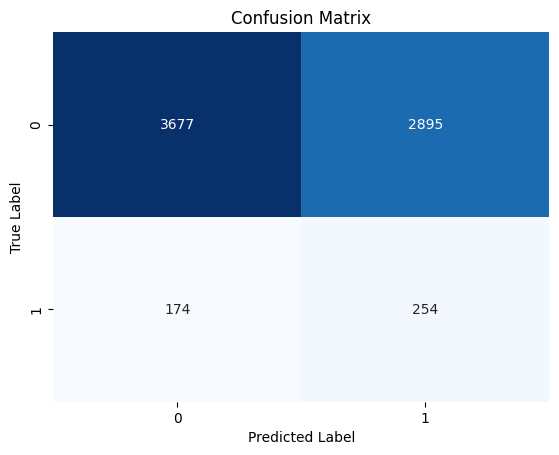

In [ ]:
display_confusion_matrix(y_pred_knn,test_labels)

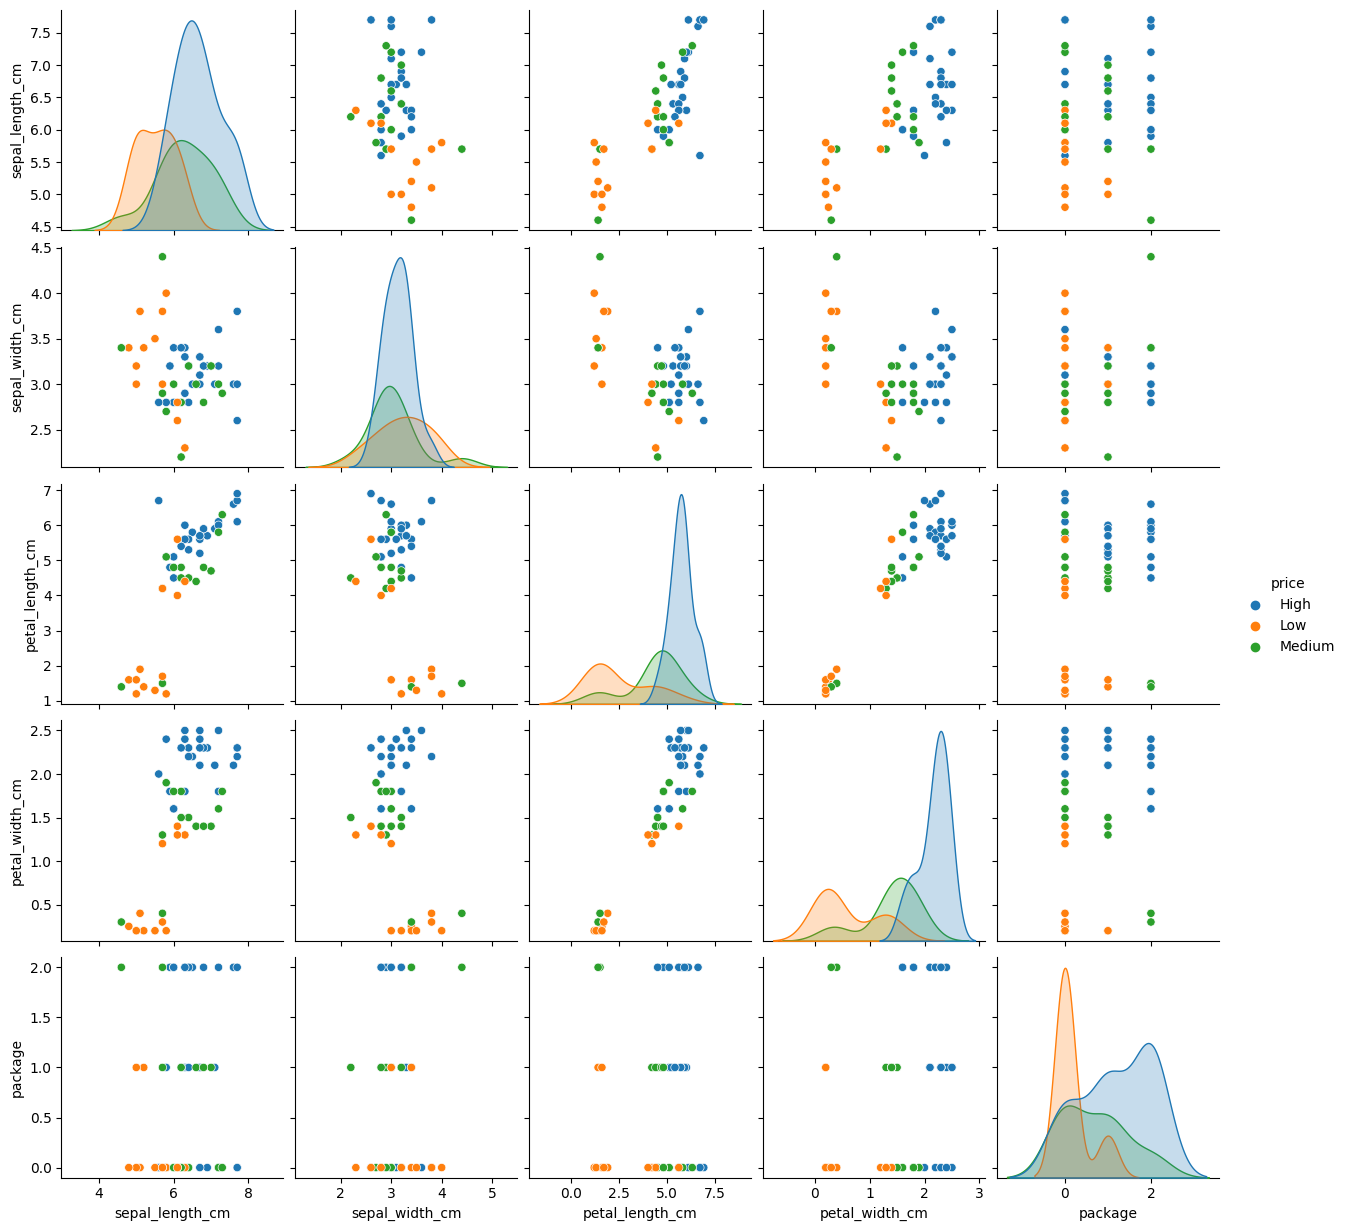

In [ ]:
from sklearn.utils import resample

# count the number of entries for each category
value_counts = iris_data['price'].value_counts()

# determine the number of entries in the minority class (i.e., "high")
minority_count = value_counts[-1]

# randomly undersample the majority classes ("medium" and "low")
majority_samples = iris_data[iris_data['price'].isin(['Medium', 'Low'])]
undersampled_majority = resample(majority_samples, replace=False, n_samples=minority_count)

# combine the minority class with the undersampled majority classes
iris_data_undersampled = pd.concat([iris_data[iris_data['price'] == 'High'], undersampled_majority])


sb.pairplot(iris_data_undersampled.dropna(), hue='price')

The classification accuracy falls tremendously! Therefore, we need to find a systematic method to discover the best parameters for our model and data set. 

The most common method for model parameter tuning is Grid Search. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

p)	Import GridSearchCV and perform a Grid Search over the Decision Tree parameters to find the best parameters, visualizing the grid with the accuracies for each parameter’s pairs (max_features 1-4 and max_depth 1-5). 

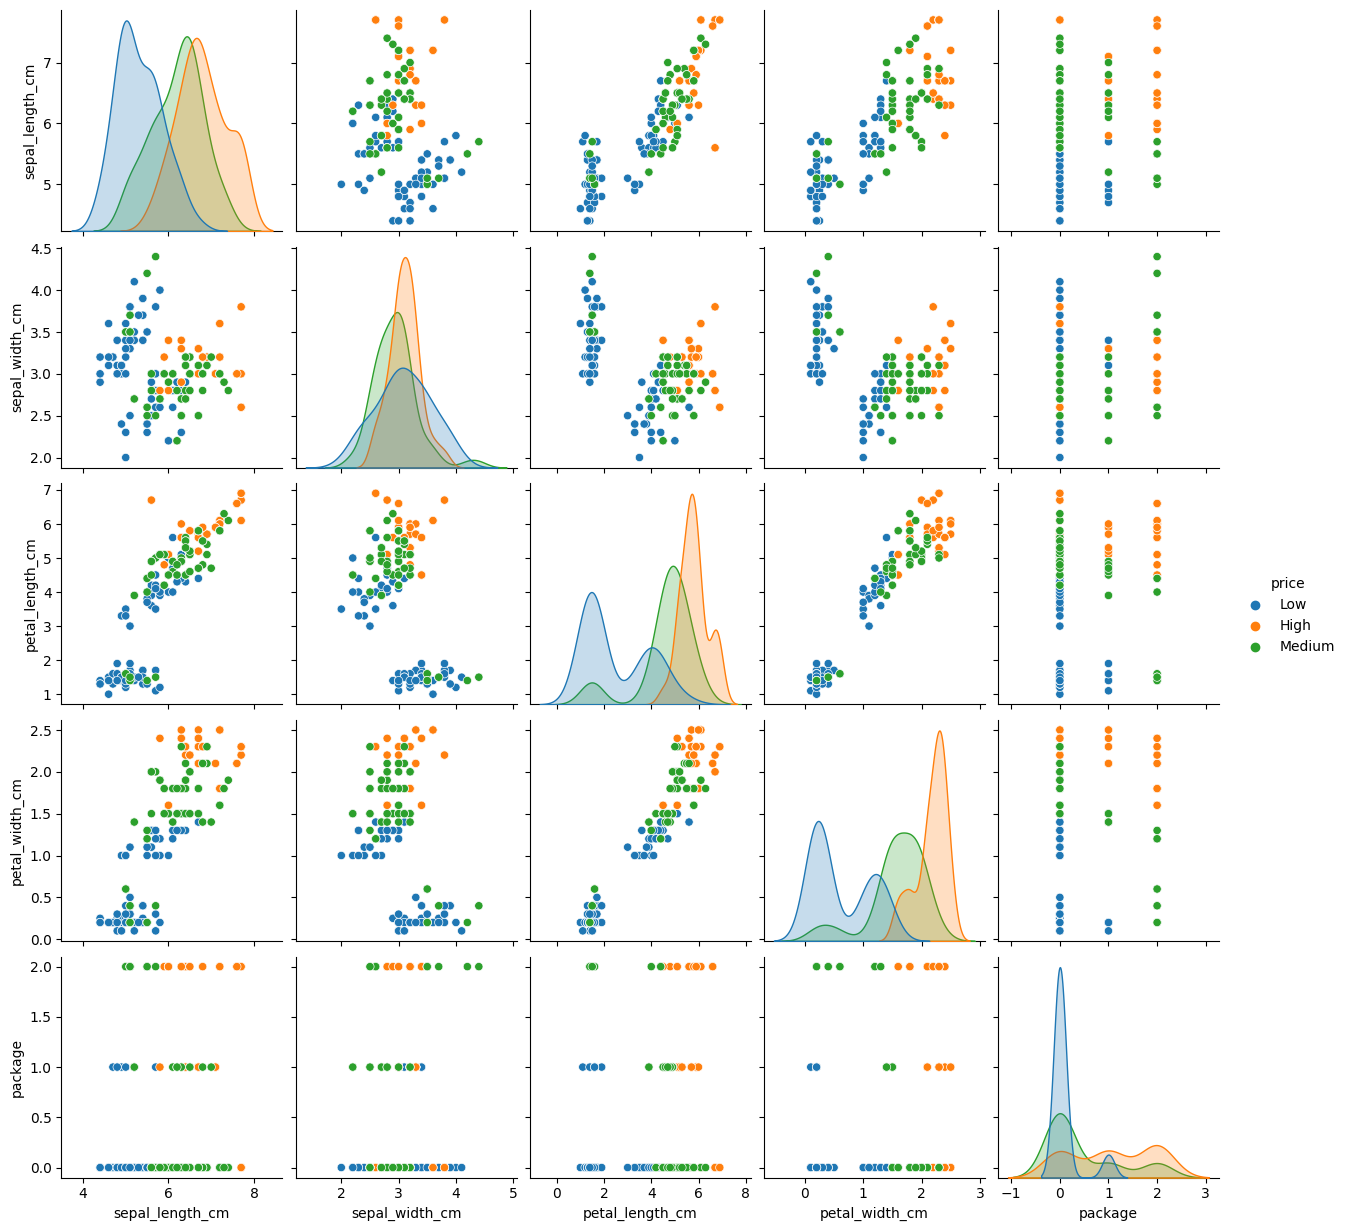

In [ ]:
import pandas as pd
from sklearn.utils import resample

# count the number of entries for each category
value_counts = iris_data['price'].value_counts()

# determine the number of entries in the minority classes (i.e., "high" and "medium")
minority_counts = value_counts[-2:]

# oversample the minority classes ("high" and "medium")
oversampled_classes = []
for cls in ['High', 'Medium']:
    minority_samples = iris_data[iris_data['price'] == cls]
    oversampled_minority = resample(minority_samples, replace=True, n_samples=value_counts.max())
    oversampled_classes.append(oversampled_minority)

# combine the oversampled minority classes with the majority class ("low")
iris_data_oversampled = pd.concat([iris_data[iris_data['price'] == 'Low']] + oversampled_classes)


sb.pairplot(iris_data_oversampled.dropna(), hue='price')

In [ ]:
undersampled_all_inputs = iris_data_undersampled[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values

# Similarly, we can extract the class labels
undersampled_all_labels = iris_data_undersampled['price'].values

(undersampled_training_inputs,
 undersampled_testing_inputs,
 undersampled_training_classes,
 undersampled_testing_classes) = train_test_split(undersampled_all_inputs, undersampled_all_labels, test_size=0.25, random_state=1)


In [ ]:
oversampled_all_inputs = iris_data_oversampled[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values

# Similarly, we can extract the class labels
oversampled_all_labels = iris_data_oversampled['price'].values

(oversampled_training_inputs,
 oversampled_testing_inputs,
 oversampled_training_classes,
 oversampled_testing_classes) = train_test_split(oversampled_all_inputs, oversampled_all_labels, test_size=0.25, random_state=1)

Now let's visualize the grid search to see how the parameters interact.

q)	Visualize in a graphical manner the final decision tree achieved. 

Accuracy: 0.6923076923076923
Precision: 0.6833333333333332
Recall: 0.688888888888889
F1-score: 0.6793650793650793


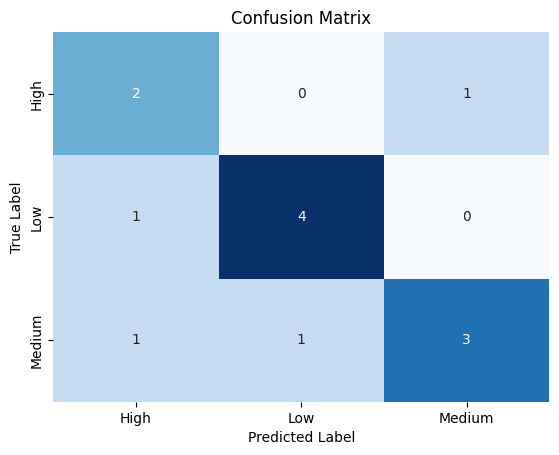

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=3)
y_pred_dt_undersampled = apply_model_and_get_stats(decision_tree_classifier,undersampled_training_inputs,
                        undersampled_training_classes,undersampled_testing_inputs,undersampled_testing_classes)


display_confusion_matrix(y_pred_dt_undersampled, undersampled_testing_classes)


Accuracy: 0.7777777777777778
Precision: 0.7928853754940711
Recall: 0.7620772946859903
F1-score: 0.7684875510962467


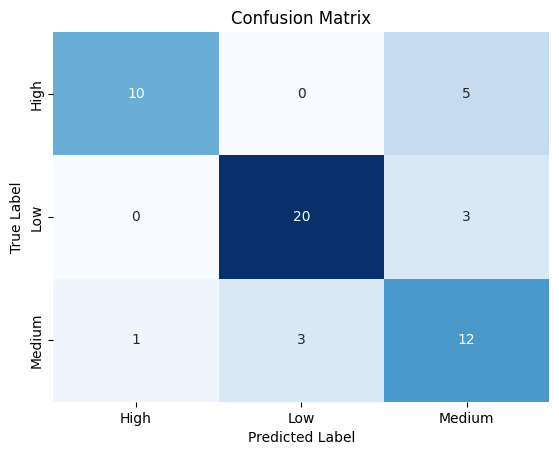

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=3)
y_pred_dt_oversampled = apply_model_and_get_stats(decision_tree_classifier,oversampled_training_inputs,
                        oversampled_training_classes,oversampled_testing_inputs,oversampled_testing_classes)


display_confusion_matrix(y_pred_dt_oversampled,oversampled_testing_classes)


Accuracy: 0.6153846153846154
Precision: 0.6166666666666667
Recall: 0.6222222222222222
F1-score: 0.6126984126984127


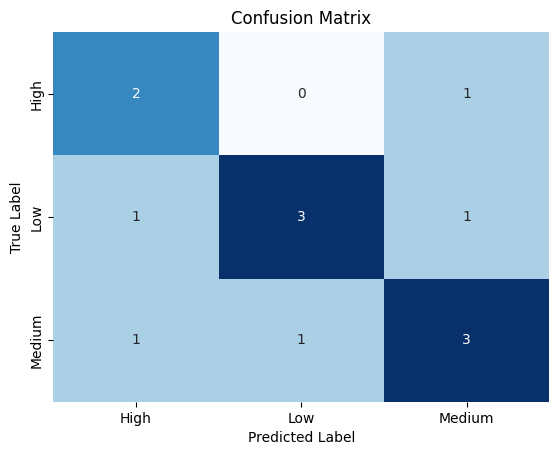

In [ ]:
knn = KNeighborsClassifier()
y_pred_knn_undersampled = apply_model_and_get_stats(knn,undersampled_training_inputs,
                        undersampled_training_classes,undersampled_testing_inputs,undersampled_testing_classes)


display_confusion_matrix(y_pred_knn_undersampled,undersampled_testing_classes)


Now we can take the best classifier from the Grid Search and use that:

Accuracy: 0.7407407407407407
Precision: 0.7405228758169935
Recall: 0.7204106280193235
F1-score: 0.7267115600448933


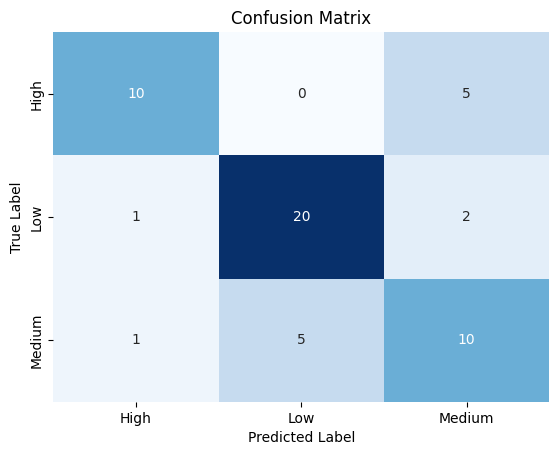

In [ ]:
knn = KNeighborsClassifier()
y_pred_knn_oversampled = apply_model_and_get_stats(knn,oversampled_training_inputs,
                        oversampled_training_classes,oversampled_testing_inputs,oversampled_testing_classes)


display_confusion_matrix(y_pred_knn_oversampled,oversampled_testing_classes)

We can even visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [ ]:
best_inputs = iris_data_oversampled[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','package']].values

# Similarly, we can extract the class labels
best_labels = iris_data_oversampled['price'].values

(best_training_inputs,
 best_testing_inputs,
 best_training_classes,
 best_testing_classes) = train_test_split(best_inputs, best_labels, test_size=0.25, random_state=1)

Accuracy: 0.9259259259259259
Precision: 0.9305555555555555
Recall: 0.9216183574879228
F1-score: 0.9255624847150893


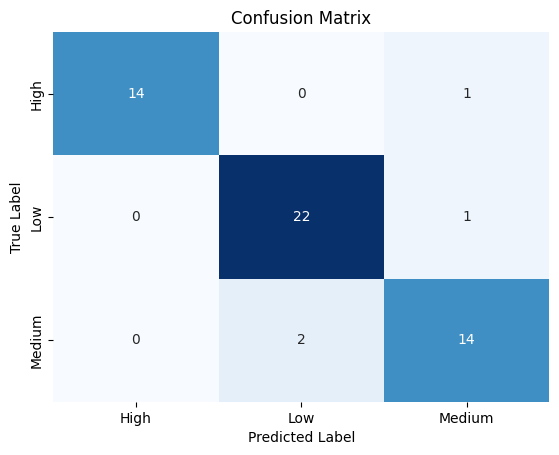

In [ ]:
dtt = DecisionTreeClassifier()
y_pred_dttn_best = apply_model_and_get_stats(dtt,best_training_inputs,
                        best_training_classes,best_testing_inputs,best_testing_classes)


display_confusion_matrix(y_pred_dttn_best,best_testing_classes)

Accuracy: 0.8703703703703703
Precision: 0.8745512820512821
Recall: 0.8668478260869565
F1-score: 0.8671208750463478


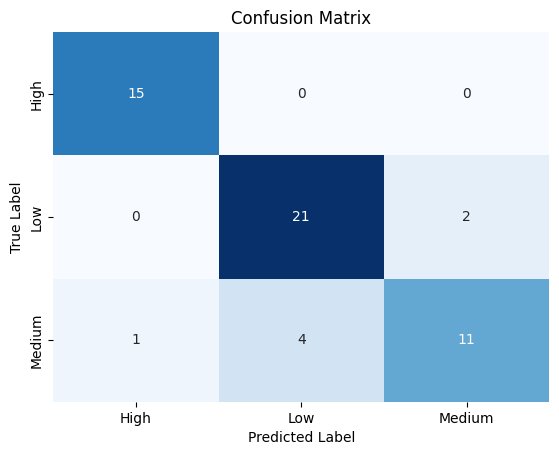

In [ ]:
knn = KNeighborsClassifier()
y_pred_knn_best = apply_model_and_get_stats(knn,best_training_inputs,
                        best_training_classes,best_testing_inputs,best_testing_classes)


display_confusion_matrix(y_pred_knn_best,best_testing_classes)

In [ ]:
from sklearn import svm

#Create a svm Classifier
svc = svm.SVC(kernel='linear') # Linear Kernel

y_pred_svm_best = apply_model_and_get_stats(svc,training_inputs,
                        training_labels,test_inputs,test_labels)


display_confusion_matrix(y_pred_svm_best,test_labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

"""
# Convert the target variable into a one-hot encoded matrix
y_train = to_categorical(best_training_classes)
y_test = to_categorical(best_testing_classes)

# Create a neural network model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(best_training_inputs, y_train, epochs=50, batch_size=10, verbose=0)

y_pred_neural_network = model.predict(best_testing_inputs)

accuracy = accuracy_score(y_test, y_pred_neural_network)

# Calculate precision
precision = precision_score(y_test, y_pred_neural_network, average='macro')

# Calculate recall
recall = recall_score(y_test, y_pred_neural_network, average='macro')

# Calculate F1-score
f1 = f1_score(y_test, y_pred_neural_network, average='macro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

display_confusion_matrix(y_pred_neural_network,best_testing_classes)
"""

2023-04-23 14:56:24.250775: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ValueError: invalid literal for int() with base 10: 'Medium'